## Lending Club Case Study

In [1]:
#To identify the encoding type import chardet
import chardet

In [2]:
with open("loan.csv","rb") as rawdata:
    result=chardet.detect(rawdata.read())
print(result)

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


In [3]:
#Import Pandas and numpy
import numpy as np
import pandas as pd
#Importing Chart Libraries
import matplotlib.pyplot as plt
import seaborn as sns
# This library will be used to ignore some warnings
import warnings 

In [4]:
#Read loan CSV
loan = pd.read_csv("loan.csv", encoding="ISO-8859-1")

C:\Users\srinivasaphanidhar.g\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
#Checking whether the loan datas are properly populated
loan.head(30)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
#Checking the loan datas shape
loan.shape

(39717, 111)

In [7]:
# Percentage of Missing Values
loancsvperce=round(100*(loan.isnull().sum()/len(loan.index)), 2)

In [8]:
# Since there are large number of columns so filtered by greater than 5
loancsvperce[loancsvperce>5]

emp_title                           6.19
desc                               32.58
mths_since_last_delinq             64.66
mths_since_last_record             92.99
next_pymnt_d                       97.13
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m                       100.00
open_rv_24m                       100.00
max_bal_bc                        100.00
all_util                          100.00
total_rev_hi_lim                  100.00
inq_fi                            100.00
total_cu_tl     

In [9]:
# If the column contains greater than 30% Null/Missing values that needs to be dropped. For that selecting the columns
# saving it in seperate element
loancsvpercedrop=loancsvperce[loancsvperce>30]
loancsvpercedrop=loancsvpercedrop.index
loancsvpercedrop

Index(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
     

In [10]:
# Copying Loan CSV , Because no change should affect original data because more number of columns going to be dropped due to null/missing values
loancopy=loan.copy()

In [11]:
# Dropping the Null Value % greater than 30
loancopy.drop(loancsvpercedrop,axis=1,inplace=True)

In [12]:
# 58 columns were dropped out of 111
loancopy.shape

(39717, 53)

# Data Cleaning

In [13]:
# cross checking the null percentage
loancsvperc1=round(100*(loancopy.isnull().sum()/len(loancopy.index)), 2)
loancsvperc1[loancsvperc1>0]

emp_title                     6.19
emp_length                    2.71
title                         0.03
revol_util                    0.13
last_pymnt_d                  0.18
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64

In [14]:
#removing emp_title,title,zipcode as these wont help us to identify the defaults and these three columns are related to customer
loancopy.drop(loancopy[['emp_title','title','zip_code']],axis=1,inplace=True)

In [15]:
#Removing NAN records, As the mean value wont fit into these rows
loancopy.dropna(subset=['emp_length', 'revol_util','last_pymnt_d','last_credit_pull_d','pub_rec_bankruptcies'], inplace=True)

In [16]:
#Finding percentage of null or missing values
round(100*(loancopy.isnull().sum()/len(loancopy.index)), 2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_length                    0.00
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec                       0.00
revol_bal                     0.00
revol_util                    0.00
total_acc           

In [17]:
# There are no Duplicate Columns in the dataset
loancopy.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [18]:
loancopy.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [19]:
# Unique elements count in each column of a dataframe. We are not considering NAN value,so using nunique(). Which will result unique element
loancopy.nunique().sort_values(False)

tax_liens                         1
initial_list_status               1
collections_12_mths_ex_med        1
policy_code                       1
pymnt_plan                        1
acc_now_delinq                    1
chargeoff_within_12_mths          1
delinq_amnt                       1
application_type                  1
term                              2
loan_status                       3
pub_rec_bankruptcies              3
verification_status               3
home_ownership                    4
pub_rec                           5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         38
addr_state                       49
issue_d                          52
total_acc                        81
last_credit_pull_d               97
last_pymnt_d                     97
int_rate                    

In [20]:
#Checking the data which has one unique value and removed them, as its not required for the analysis. 
loancopy.nunique(dropna=False).sort_values(False)

tax_liens                         1
initial_list_status               1
policy_code                       1
application_type                  1
pymnt_plan                        1
delinq_amnt                       1
acc_now_delinq                    1
term                              2
chargeoff_within_12_mths          2
collections_12_mths_ex_med        2
loan_status                       3
pub_rec_bankruptcies              3
verification_status               3
home_ownership                    4
pub_rec                           5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         38
addr_state                       49
issue_d                          52
total_acc                        81
last_credit_pull_d               97
last_pymnt_d                     97
int_rate                    

In [21]:
#Taking a random column which dervided from above iteration and analysisng the value. Since the value contains o & na , we can go head to remove the column
loancopy.tax_liens.unique()

array([0.])

In [22]:
#Checking Unique value other than NAN
loancopy.tax_liens.nunique()

1

In [23]:
#Dropping column which has only one unique value
loancopy.drop(loancopy[['tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','application_type','policy_code','collections_12_mths_ex_med','initial_list_status','pymnt_plan']],axis=1,inplace=True)

In [24]:
#The customer behavior variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval.
loancopy.drop(loancopy[['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d']],axis=1,inplace=True)

In [25]:
#Checking the shape
loancopy.shape

(37835, 21)

In [26]:
#From the above iteration of unqiue, we found that URL,ID,MemberID has same amount of unique value.
loancopy[['url','id','member_id']]

,url,id,member_id
0,https://lendingclub.com/browse/loanDetail.acti...,1077501,1296599
1,https://lendingclub.com/browse/loanDetail.acti...,1077430,1314167
2,https://lendingclub.com/browse/loanDetail.acti...,1077175,1313524
3,https://lendingclub.com/browse/loanDetail.acti...,1076863,1277178
4,https://lendingclub.com/browse/loanDetail.acti...,1075358,1311748
...,...,...,...
39562,https://lendingclub.com/browse/loanDetail.acti...,154154,151536
39573,https://lendingclub.com/browse/loanDetail.acti...,150940,150893
39623,https://lendingclub.com/browse/loanDetail.acti...,132892,132889
39666,https://lendingclub.com/browse/loanDetail.acti...,119043,119040


In [27]:
#Since the columns contains same unique value, then we are taking ID and dropping memberID & URL
loancopy.drop(loancopy[['url','member_id']],axis=1,inplace=True)

In [28]:
#Checking the shape 
loancopy.shape

(37835, 19)

In [29]:
#Analysing whether the datatype are correct using info
loancopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37835 entries, 0 to 39680
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    37835 non-null  int64  
 1   loan_amnt             37835 non-null  int64  
 2   funded_amnt           37835 non-null  int64  
 3   funded_amnt_inv       37835 non-null  float64
 4   term                  37835 non-null  object 
 5   int_rate              37835 non-null  object 
 6   installment           37835 non-null  float64
 7   grade                 37835 non-null  object 
 8   sub_grade             37835 non-null  object 
 9   emp_length            37835 non-null  object 
 10  home_ownership        37835 non-null  object 
 11  annual_inc            37835 non-null  float64
 12  verification_status   37835 non-null  object 
 13  issue_d               37835 non-null  object 
 14  loan_status           37835 non-null  object 
 15  purpose            

In [30]:
#Comparing the datatype of info with actual data and found that term apply and interest rate has Datatype as object instead of int and float respectively
loancopy.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0.0


In [31]:
#DataType Correction
loancopy.term=loancopy.term.apply(lambda x: int(x.replace('months','')))
loancopy.int_rate=loancopy.int_rate.apply(lambda x: float(x.replace("%",'')))
#Extracting integer from String
loancopy.emp_length=loancopy.emp_length.replace("< 1 year",'0')
loancopy.emp_length= loancopy.emp_length.apply(lambda x : int("".join(filter(str.isdigit, str(x)))))
#Splitting Month and Year Seperately
loancopy['issue_month']=loancopy.issue_d.apply(lambda x: x.strip().split('-')[0])
loancopy['issue_year']=loancopy.issue_d.apply(lambda x: x.strip().split('-')[1])
loancopy['issue_year']=2000+loancopy['issue_year'].astype(int)
#loancopy.revol_util=loancopy.revol_util.apply(lambda x: float(x.replace("%",'')))

In [32]:
#Validating whether the months and % are removed from the respective column
loancopy.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_month,issue_year
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,10,...,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0,Dec,2011
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,0,...,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0,Dec,2011
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,C5,10,...,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0,Dec,2011
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,C1,10,...,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0,Dec,2011
4,1075358,3000,3000,3000.0,60,12.69,67.79,B,B5,1,...,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0.0,Dec,2011


In [33]:
#After correcting the datatype verifying whether its reflected or not
loancopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37835 entries, 0 to 39680
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    37835 non-null  int64  
 1   loan_amnt             37835 non-null  int64  
 2   funded_amnt           37835 non-null  int64  
 3   funded_amnt_inv       37835 non-null  float64
 4   term                  37835 non-null  int64  
 5   int_rate              37835 non-null  float64
 6   installment           37835 non-null  float64
 7   grade                 37835 non-null  object 
 8   sub_grade             37835 non-null  object 
 9   emp_length            37835 non-null  int64  
 10  home_ownership        37835 non-null  object 
 11  annual_inc            37835 non-null  float64
 12  verification_status   37835 non-null  object 
 13  issue_d               37835 non-null  object 
 14  loan_status           37835 non-null  object 
 15  purpose            

In [34]:
#In Case Study, it was clearly mentioned that the loan status which we need to refer is not a current loan, we should 
#progress on Fully paid and not paid i.e "The data given below contains the information about past loan applicants"
loancopy=loancopy[loancopy.loan_status!='Current']

In [35]:
loancopy

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_month,issue_year
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,10,...,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0,Dec,2011
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,0,...,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0,Dec,2011
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,C5,10,...,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0,Dec,2011
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,C1,10,...,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0,Dec,2011
5,1075269,5000,5000,5000.0,36,7.90,156.46,A,A4,3,...,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.0,Dec,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39562,154154,4800,4800,1100.0,36,10.28,155.52,C,C1,1,...,35000.0,Not Verified,Nov-07,Fully Paid,debt_consolidation,VA,7.51,1.0,Nov,2007
39573,150940,7000,7000,1000.0,36,10.59,227.82,C,C2,3,...,63500.0,Not Verified,Nov-07,Fully Paid,debt_consolidation,AZ,8.50,1.0,Nov,2007
39623,132892,9000,9000,700.0,36,12.49,301.04,D,D3,8,...,39000.0,Not Verified,Oct-07,Charged Off,debt_consolidation,MD,5.08,1.0,Oct,2007
39666,119043,15450,15450,600.0,36,11.22,507.46,C,C4,2,...,40000.0,Not Verified,Aug-07,Charged Off,debt_consolidation,VA,13.50,1.0,Aug,2007


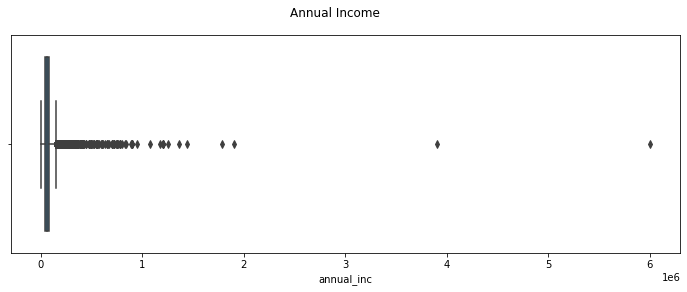

In [36]:
#Annual Income Outliers
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Box plot
sns.boxplot(x=loancopy['annual_inc'],data=loancopy)
# title for boxplots.
plt.suptitle('Annual Income')
plt.show()

In [37]:
#Calculating Q25 & 75 of Annual Income
q25, q75 = np.percentile(loancopy['annual_inc'], 25), np.percentile(loancopy['annual_inc'], 75)
print("Annual Income 25th Percentile :"  + str(q25))
print("Annual Income 75th Percentile :"  + str(q75))
#Calculating IQR Value
iqr = q75 - q25
print("Annual Income IQR :"  + str(iqr))
# Calculating Cutoof value, so that it will be easy while subracting from quartile range
cut_off = iqr * 1.5
print("Annual Income Cut-OFF :"  + str(cut_off))
#Calculating lower and upper quartile range
lower, upper = q25 - cut_off, q75 + cut_off
print("Annual Income Lower Range :"  + str(lower))
print("Annual Income Upper Range :"  + str(upper))
#Based on the range if we filter we will be getting the outliers
Annual_Income_outliers = [x for x in loancopy['annual_inc'] if x < lower or x > upper]
#These outliers were removed and stored it loancopy as well as in a seperate varaible for future use.
Annual_Income_outliers_removed = [x for x in loancopy['annual_inc'] if x > lower and x < upper]
loancopy=loancopy[loancopy['annual_inc'].apply(lambda x: x > lower and x < upper)]

Annual Income 25th Percentile :41200.0
Annual Income 75th Percentile :83000.0
Annual Income IQR :41800.0
Annual Income Cut-OFF :62700.0
Annual Income Lower Range :-21500.0
Annual Income Upper Range :145700.0


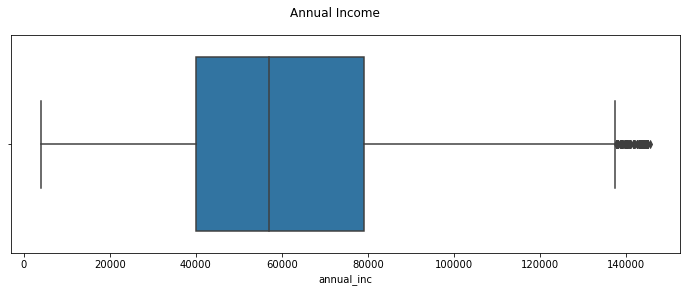

In [38]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Box plot
sns.boxplot(x=loancopy['annual_inc'],data=loancopy)
# title for boxplots.
plt.suptitle('Annual Income')
plt.show()

In [39]:
loancopy

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_month,issue_year
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,10,...,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0,Dec,2011
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,0,...,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0,Dec,2011
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,C5,10,...,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0,Dec,2011
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,C1,10,...,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0,Dec,2011
5,1075269,5000,5000,5000.0,36,7.90,156.46,A,A4,3,...,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.0,Dec,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39562,154154,4800,4800,1100.0,36,10.28,155.52,C,C1,1,...,35000.0,Not Verified,Nov-07,Fully Paid,debt_consolidation,VA,7.51,1.0,Nov,2007
39573,150940,7000,7000,1000.0,36,10.59,227.82,C,C2,3,...,63500.0,Not Verified,Nov-07,Fully Paid,debt_consolidation,AZ,8.50,1.0,Nov,2007
39623,132892,9000,9000,700.0,36,12.49,301.04,D,D3,8,...,39000.0,Not Verified,Oct-07,Charged Off,debt_consolidation,MD,5.08,1.0,Oct,2007
39666,119043,15450,15450,600.0,36,11.22,507.46,C,C4,2,...,40000.0,Not Verified,Aug-07,Charged Off,debt_consolidation,VA,13.50,1.0,Aug,2007


### Derived Variables

- loan_amnt
- funded_amnt
- funded_amnt_inv
- term
- int_rate
- installment
- grade
- sub_grade
- home_ownership
- loan_status
- purpose
- emp_length
- annual_inc
- verification_status
- DTI

# UniVariate Analysis

In [40]:
#Creating Definition for Univariate Analysis
def univariatecountplot(univalue,dataf,xaxis,yaxis):
    ncount = len(dataf)
    dims = (xaxis,yaxis)
    plt.figure(figsize=dims)
    ax = sns.countplot(x=univalue, data=dataf,hue=None,palette="Set3")
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text
    plt.show()
    return ax
def univariateboxplot(univalue,dataf,xaxis,yaxis):
    #Increasing the figure size of plot
    plt.figure(figsize=(xaxis,yaxis))
    #Box plot
    sns.boxplot(data=loancopy[univalue])
    # title for boxplots.
    plt.suptitle(univalue.upper())
    plt.show()

### Loan Amount , Funded Amount, Funded Amount Investment

<Figure size 720x576 with 0 Axes>

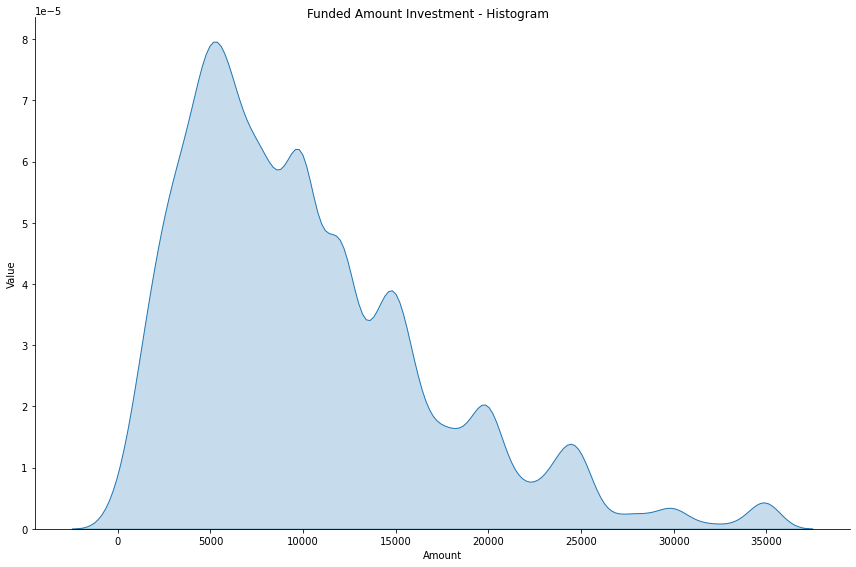

In [41]:
#Increasing the figure size of plot
plt.figure(figsize=(10,8))
#Histogram plot
sns.displot(data=loancopy['funded_amnt_inv'],kind='kde', fill=True, palette=sns.color_palette('bright')[:3],height=8, aspect=1.5).set(xlabel='Amount', ylabel='Value')
# title for  Histogram lots.
plt.suptitle('Funded Amount Investment - Histogram')
plt.show()


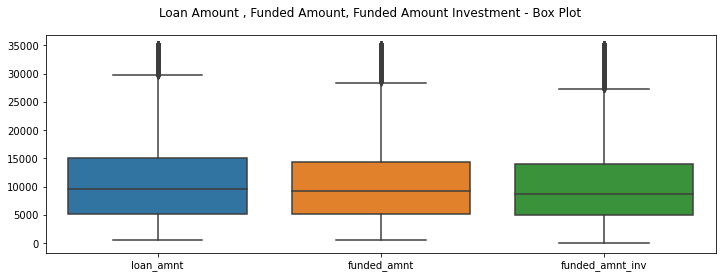

In [42]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Box plot
sns.boxplot(data=loancopy[['loan_amnt','funded_amnt','funded_amnt_inv']])
# title for boxplots.
plt.suptitle('Loan Amount , Funded Amount, Funded Amount Investment - Box Plot')
plt.show()

In [43]:
loanamtgt=round(100*(loancopy.loan_amnt[loancopy.loan_amnt>30000].count()/len(loancopy.index)), 2)
fundamtgt=round(100*(loancopy.loan_amnt[loancopy.funded_amnt>30000].count()/len(loancopy.index)), 2)
fundamtinvgt=round(100*(loancopy.loan_amnt[loancopy.funded_amnt_inv>30000].count()/len(loancopy.index)), 2)
print("Loan Amount greater than 30000 in % :"  + str(loanamtgt))
print("Funded Amount greater than 30000 in % :"  + str(fundamtgt))
print("Funded Amount greater than 30000 Investment in % :"  +  str(fundamtinvgt))

Loan Amount greater than 30000 in % :1.53
Funded Amount greater than 30000 in % :1.28
Funded Amount greater than 30000 Investment in % :1.18


#### Remark:
#### As we can see that the most of the people who took the loan amount of 10,000  i.e Median (BoxPlot) was 10,000 and few of them took loan amount greater than 30,000 (Which is of 1.96%)

### Term

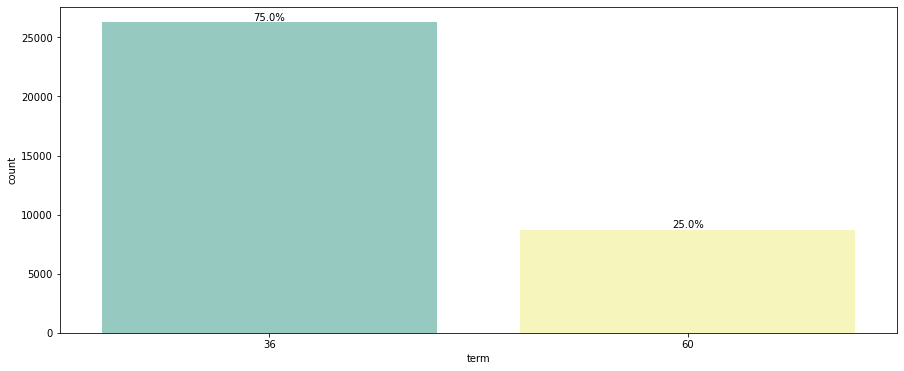

<AxesSubplot:xlabel='term', ylabel='count'>

In [44]:
univariatecountplot('term',loancopy,15,6)

#### Remark:
#### As we can see Most of the customers are opting for 36 months loan (i.e 74.9%) and 25.1% are opting for 60 months loan tenure.

### Interest Rate

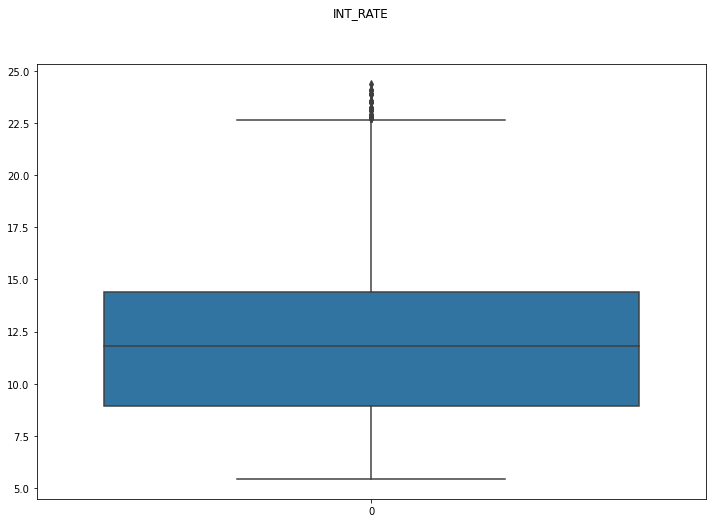

In [45]:
univariateboxplot('int_rate',loancopy,12,8)

<Figure size 864x288 with 0 Axes>

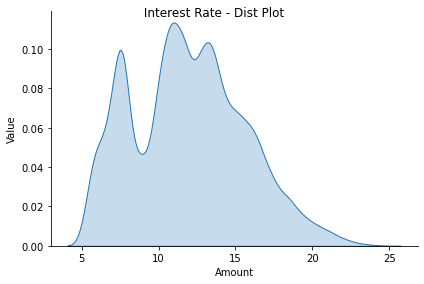

In [46]:
#Plotting the Interest Rate to understand the binning
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Histogram plot
sns.displot(data=loancopy['int_rate'],kind='kde', fill=True, palette=sns.color_palette('bright')[:3],height=4, aspect=1.5).set(xlabel='Amount', ylabel='Value')
# title for  Histogram lots.
plt.suptitle(' Interest Rate - Dist Plot')
plt.show()

In [47]:
loancopy['int_rate'].describe()

count    35032.000000
mean        11.936335
std          3.678000
min          5.420000
25%          8.940000
50%         11.830000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64

In [48]:
intrategt=round(100*(loancopy.loan_amnt[loancopy.int_rate>22.5].count()/len(loancopy.index)), 2)
print("Interest Rate Greater than 22.5 in % :"  + str(intrategt))

Interest Rate Greater than 22.5 in % :0.16


#### Remark:
#### As we can see that most of the loans opted by customer ranges between 8.94 to 14.42% and few customers (0.18%) took loan greater than 22.5%

### Installment

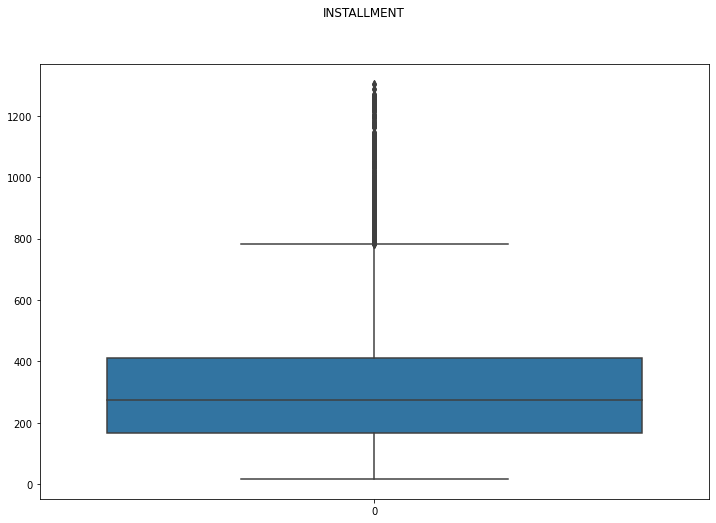

In [49]:
univariateboxplot('installment',loancopy,12,8)

#### Remark:
#### As we can see that monthly customer were paying the installment amount between 190 to 450

### Grade

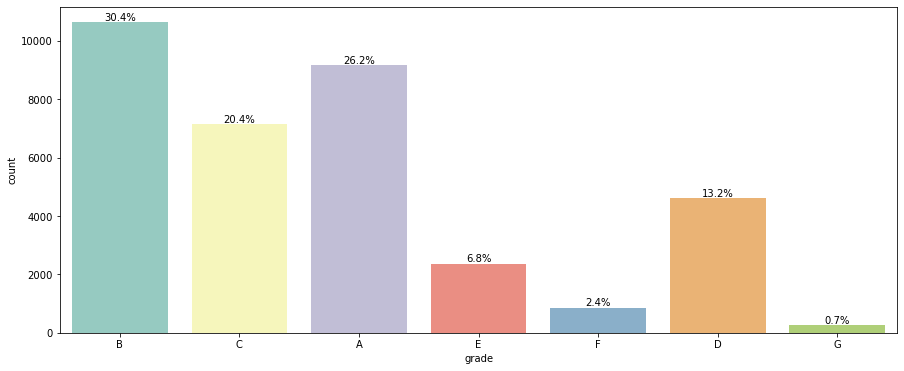

<AxesSubplot:xlabel='grade', ylabel='count'>

In [50]:
univariatecountplot('grade',loancopy,15,6)

#### Remark:
#### As we can see that 'B' grade (i.e 30.3%) and 'A' grade (i.e 25.9%) customers got more loan when compared to other grades

### Sub Grade

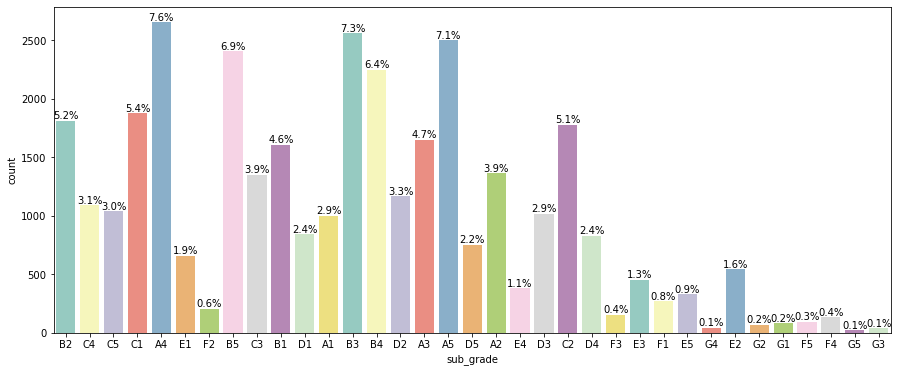

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

In [51]:
univariatecountplot('sub_grade',loancopy,15,6)

#### Remark:
#### As we came to know that The Grade B and A has got more loans and in that Sub Grade A4, B3, A5 received more number of loans compared to other sub grades

### Home Ownership

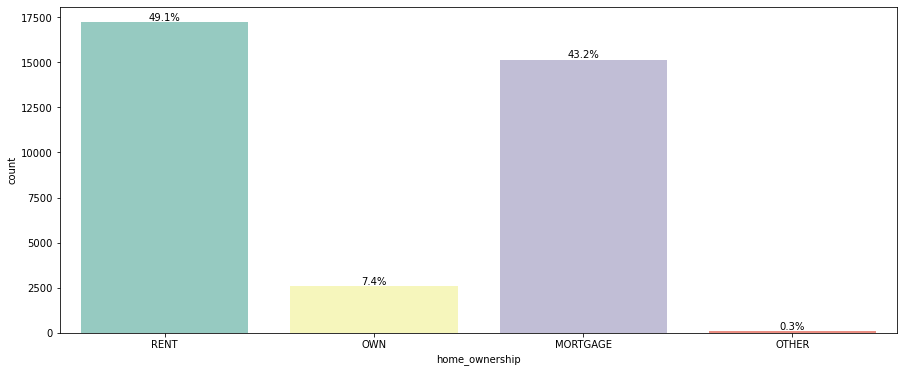

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

In [52]:
univariatecountplot('home_ownership',loancopy,15,6)

#### Remark:
#### Most of the home ownership status provided by the borrower during registration was of Rent (i.e 48%) and second highest was of Mortage(i.e 44.4%)

### Loan Status

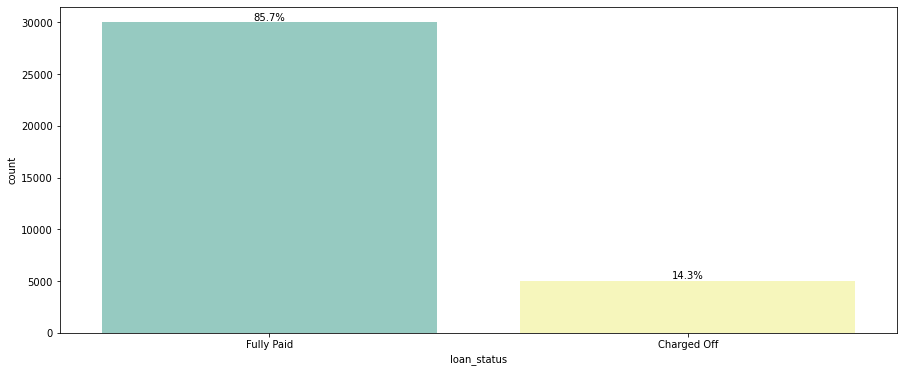

<AxesSubplot:xlabel='loan_status', ylabel='count'>

In [53]:
univariatecountplot('loan_status',loancopy,15,6)

#### Remark:
#### As we can see that 85.8% of the loan are fully paid and 14.2% is of charged offf (Defaulted)

### Purpose

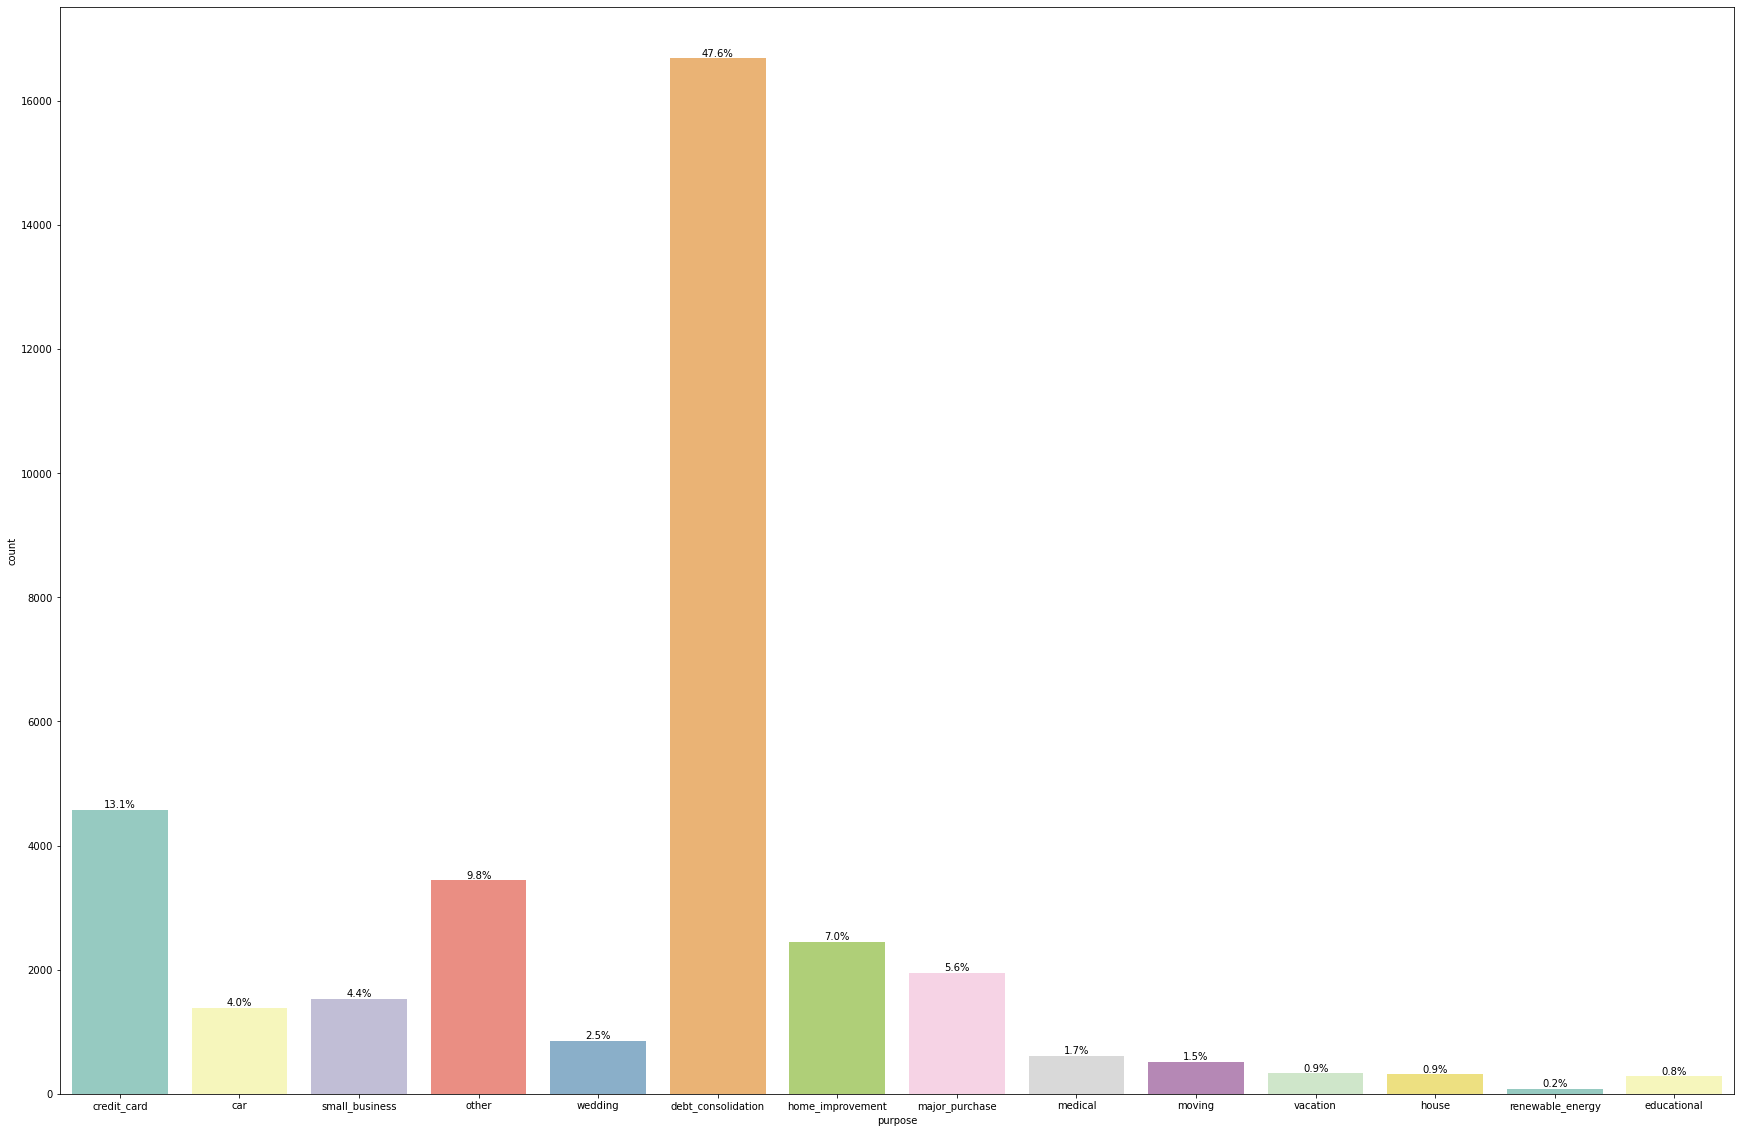

<AxesSubplot:xlabel='purpose', ylabel='count'>

In [54]:
univariatecountplot('purpose',loancopy,30,20)

#### Remark:
#### As we can see that during loan request, Most of the customers where requested for debt_consilidation (i.e 47.2%)

### Employee Length

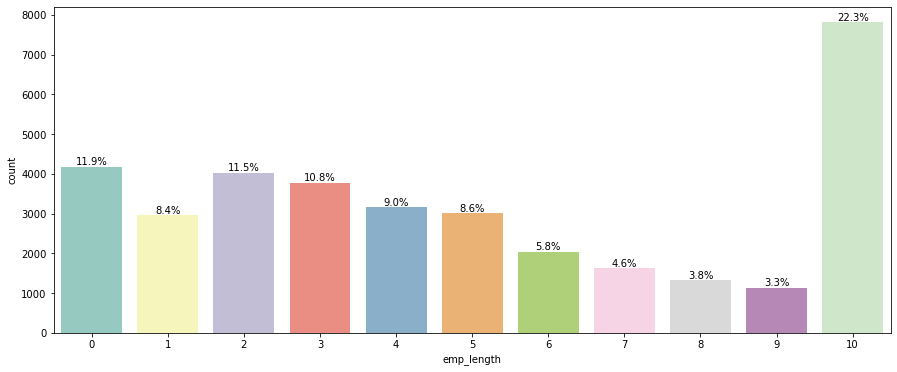

<AxesSubplot:xlabel='emp_length', ylabel='count'>

In [55]:
univariatecountplot('emp_length',loancopy,15,6)

#### Remarks
#### As we can see that 22.3% of loan taken by the customer are having10 years of experience

### Annual Income

##### As we can see that the below box plot has some outliers, So we need to remove the outliers using IQR and again need to plot the chart for better result

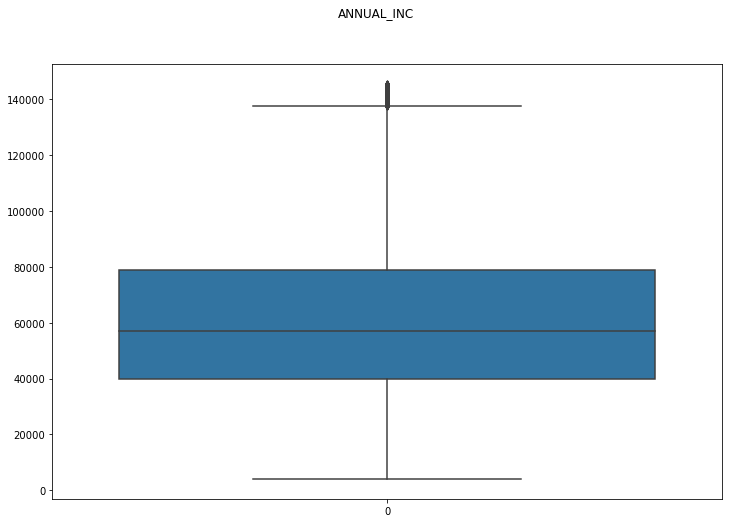

In [56]:
#Plotting the Annual Income after Outliers removed
univariateboxplot('annual_inc',loancopy,12,8)

<Figure size 864x288 with 0 Axes>

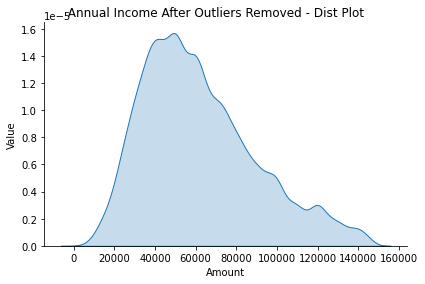

In [57]:
#Plotting the Annual Income after Outliers removed to understand the binning
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Histogram plot
sns.displot(data=loancopy['annual_inc'],kind='kde', fill=True, palette=sns.color_palette('bright')[:3],height=4, aspect=1.5).set(xlabel='Amount', ylabel='Value')
# title for  Histogram lots.
plt.suptitle('  Annual Income After Outliers Removed - Dist Plot')
plt.show()

#### Remark:
#### As we can see that Annaul Income of the customer lies between 40000 and 80000  and median of about 55000 and binning is of 10000

### Verification Status

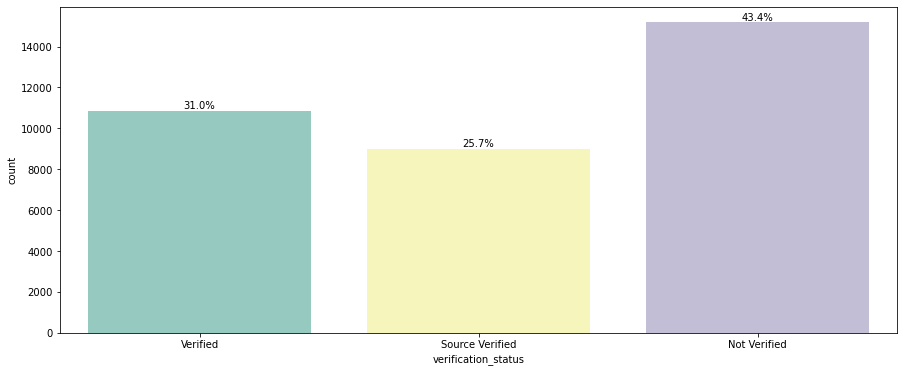

<AxesSubplot:xlabel='verification_status', ylabel='count'>

In [58]:
univariatecountplot('verification_status',loancopy,15,6)

#### Remark:
#### To be surprised that the 43.4% of the loans were not verified.

## Debt to Income (DTI)

<Figure size 864x288 with 0 Axes>

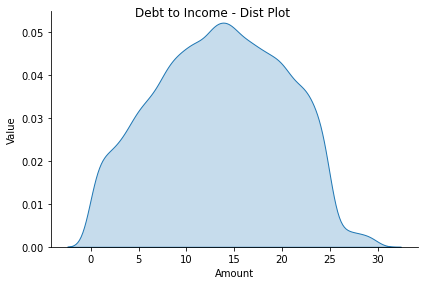

<Figure size 864x288 with 0 Axes>

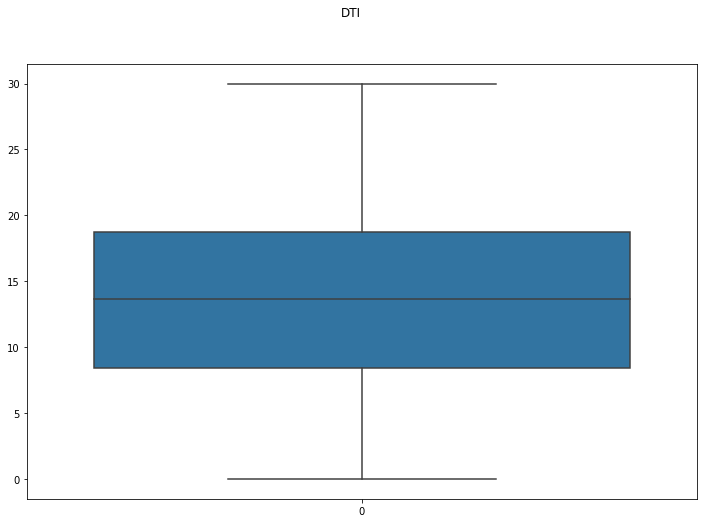

In [59]:
plt.figure(figsize=(12,4))
#Histogram plot
sns.displot(data=loancopy['dti'],kind='kde', fill=True, palette=sns.color_palette('bright')[:3],height=4, aspect=1.5).set(xlabel='Amount', ylabel='Value')
# title for  Histogram lots.
plt.suptitle('Debt to Income - Dist Plot')
plt.show()
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Box plot
univariateboxplot('dti',loancopy,12,8)

#### Remark:
#### As we can see that the median of DTI was of 13.5%

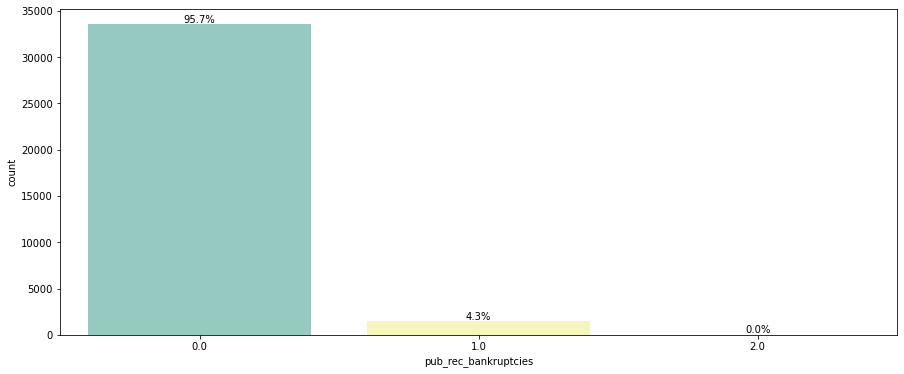

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='count'>

In [60]:
univariatecountplot('pub_rec_bankruptcies',loancopy,15,6)

# Segmented Univariate Analysis

In [61]:
def segunivariatecountplot(x,hue,xaxis,yaxis):
    total = float(len(loancopy))
    plt.subplots(figsize=(xaxis, yaxis))
    seguni=sns.countplot(x=x, hue=hue, data=loancopy)
    for p in seguni.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        seguni.annotate(percentage, (x, y),ha='center', va='bottom')
    plt.show()
    return seguni

### - Loan Purpose 

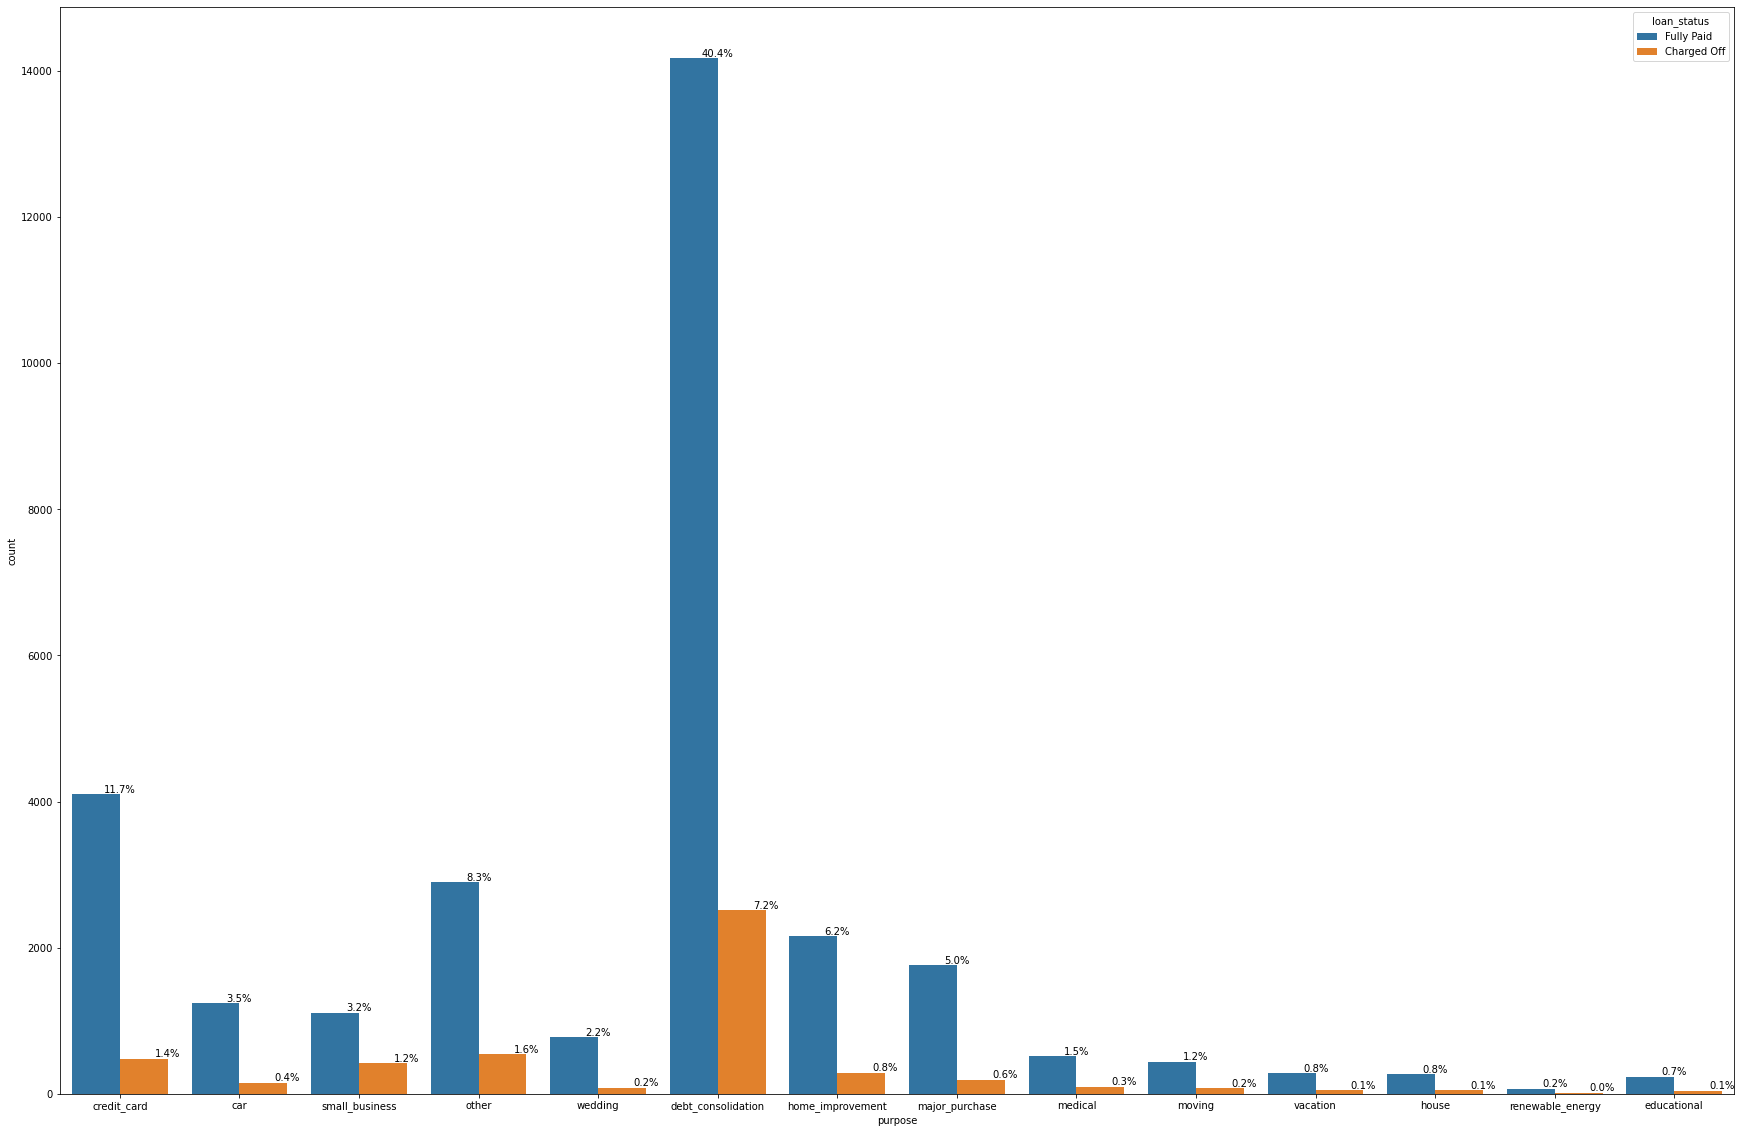

<AxesSubplot:xlabel='purpose', ylabel='count'>

In [62]:
segunivariatecountplot('purpose',"loan_status",30,20)

#### Remarks:
#### As we can see that while providing loan, most of them mentioned the purpose as 'debt consolidation' and they  re-paid the loan amount and some wheren't paid the amount for the 'debt consolidation purpose' , as we termed them as defaulter

### - Term

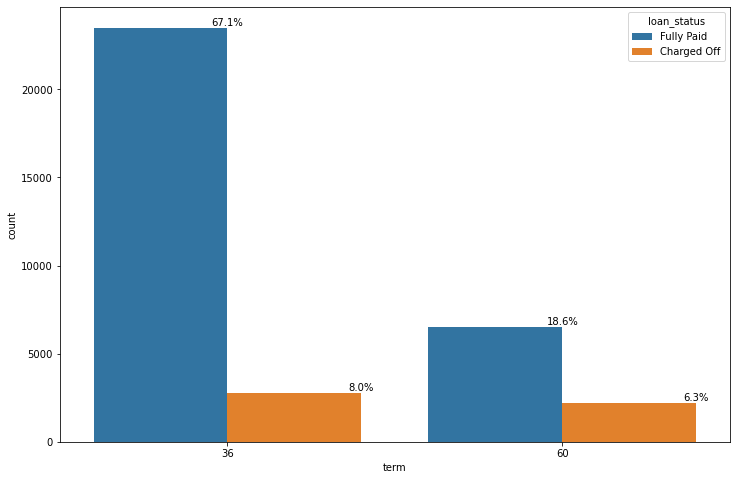

<AxesSubplot:xlabel='term', ylabel='count'>

In [63]:
segunivariatecountplot('term',"loan_status",12,8)

#### Remarks:
#### As we can see that when the tenure is lower, there are about 67% of customers where fully paid and with that 8% of the customer were defaulters

### - Funded Amount Investment

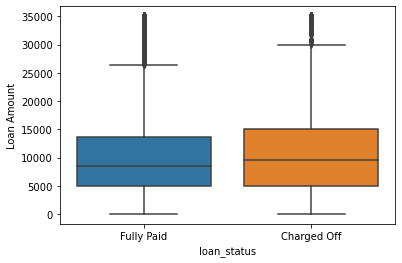

In [64]:
sns.boxplot( y="funded_amnt_inv", x='loan_status' , data=loancopy)
plt.ylabel('Loan Amount')
plt.show()

#### Remarks:
#### As we can see that the median of Funded amount investment for fully charges and charged off are more or less similiar i.e difference will be less than 1000

## - Term

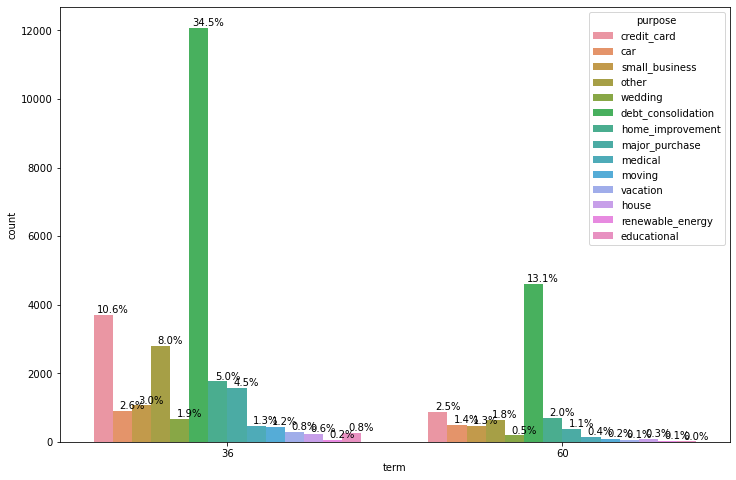

<AxesSubplot:xlabel='term', ylabel='count'>

In [65]:
segunivariatecountplot('term',"purpose",12,8)

#### Remarks:
#### As we can see that for Term 36 months majority of the purpose mentioned during loan approving was 'debt consolidation'

## - Purpose

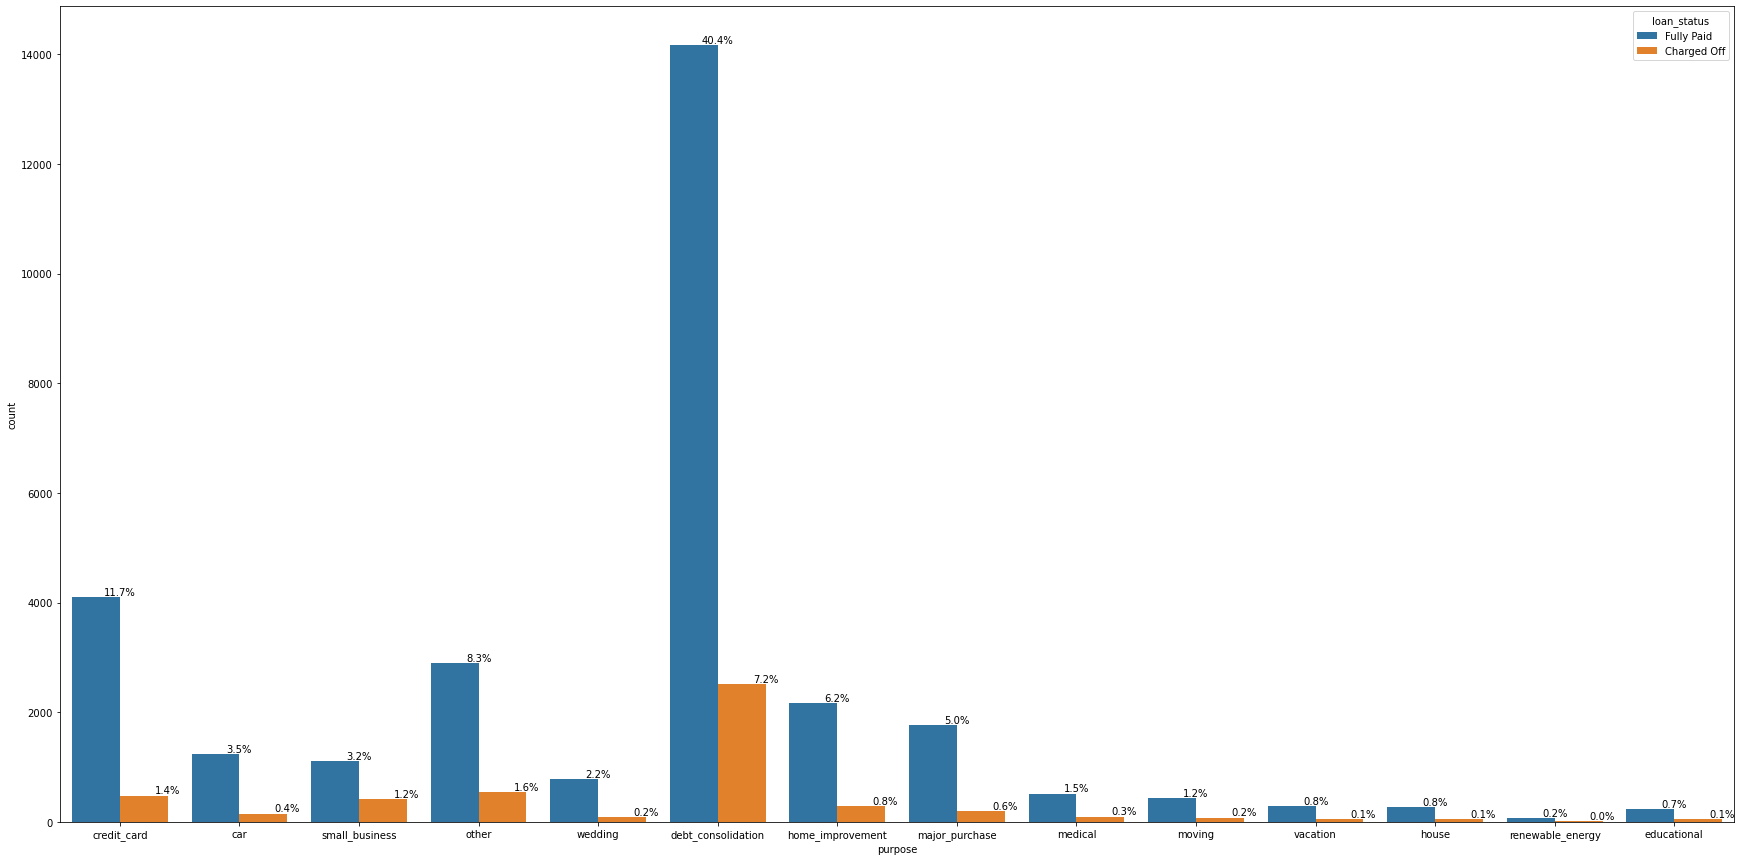

<AxesSubplot:xlabel='purpose', ylabel='count'>

In [66]:
segunivariatecountplot('purpose',"loan_status",30,15)

#### Remarks:
#### As we can see that most of the loan purpose was debt consolidation (40.4%) and that to the loans were fully paid. For the same purpose the defaulter were at maximum i.e 7.2% compared to other purposes

## Home Ownership

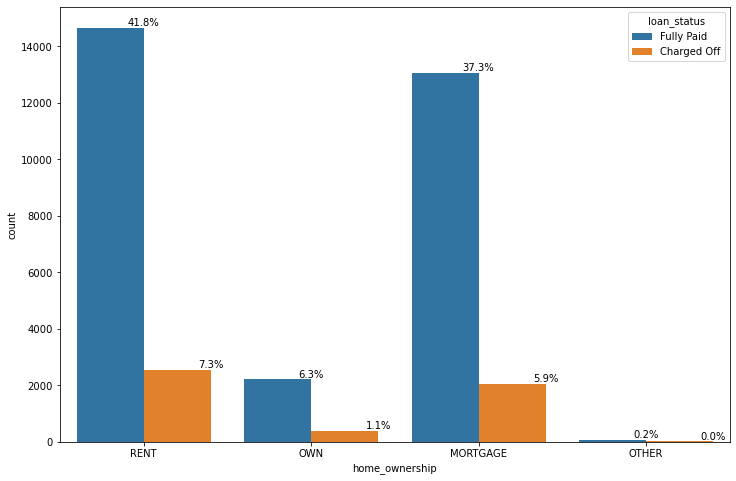

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

In [67]:
segunivariatecountplot('home_ownership',"loan_status",12,8)

#### Remarks:
#### As we can see that customers have taken the loan & fully paid are present in Rented home(i.e 41.8%) and in same category the defaulters were at 7.3%

## - Issue Month

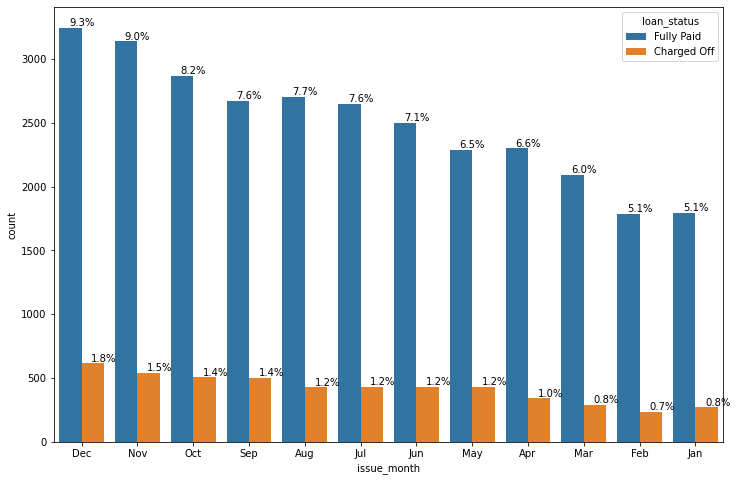

<AxesSubplot:xlabel='issue_month', ylabel='count'>

In [68]:
segunivariatecountplot('issue_month',"loan_status",12,8)

#### Remarks:
#### As we notice that the loan issued month were gradually increasing from jan to december with Fully paid as well as charged off

## - Issue Year

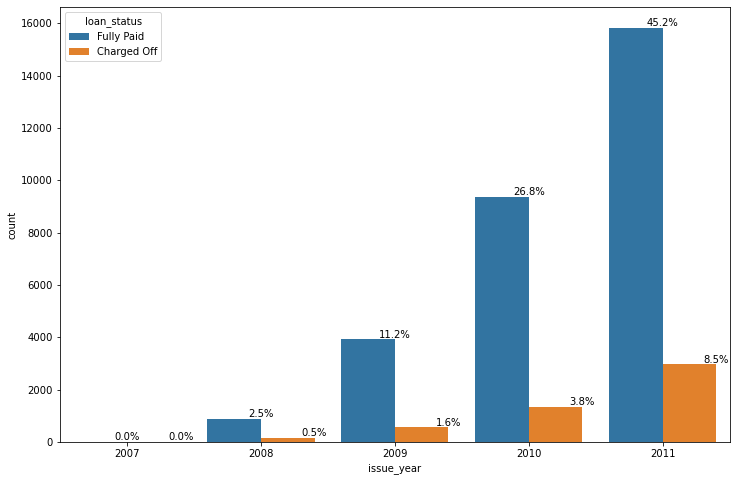

<AxesSubplot:xlabel='issue_year', ylabel='count'>

In [69]:
segunivariatecountplot('issue_year',"loan_status",12,8)

#### Remarks:
#### As we notice that the loan issued year were gradually increasing from 2007 to 2011 with Fully paid as well as charged off

## - Address State

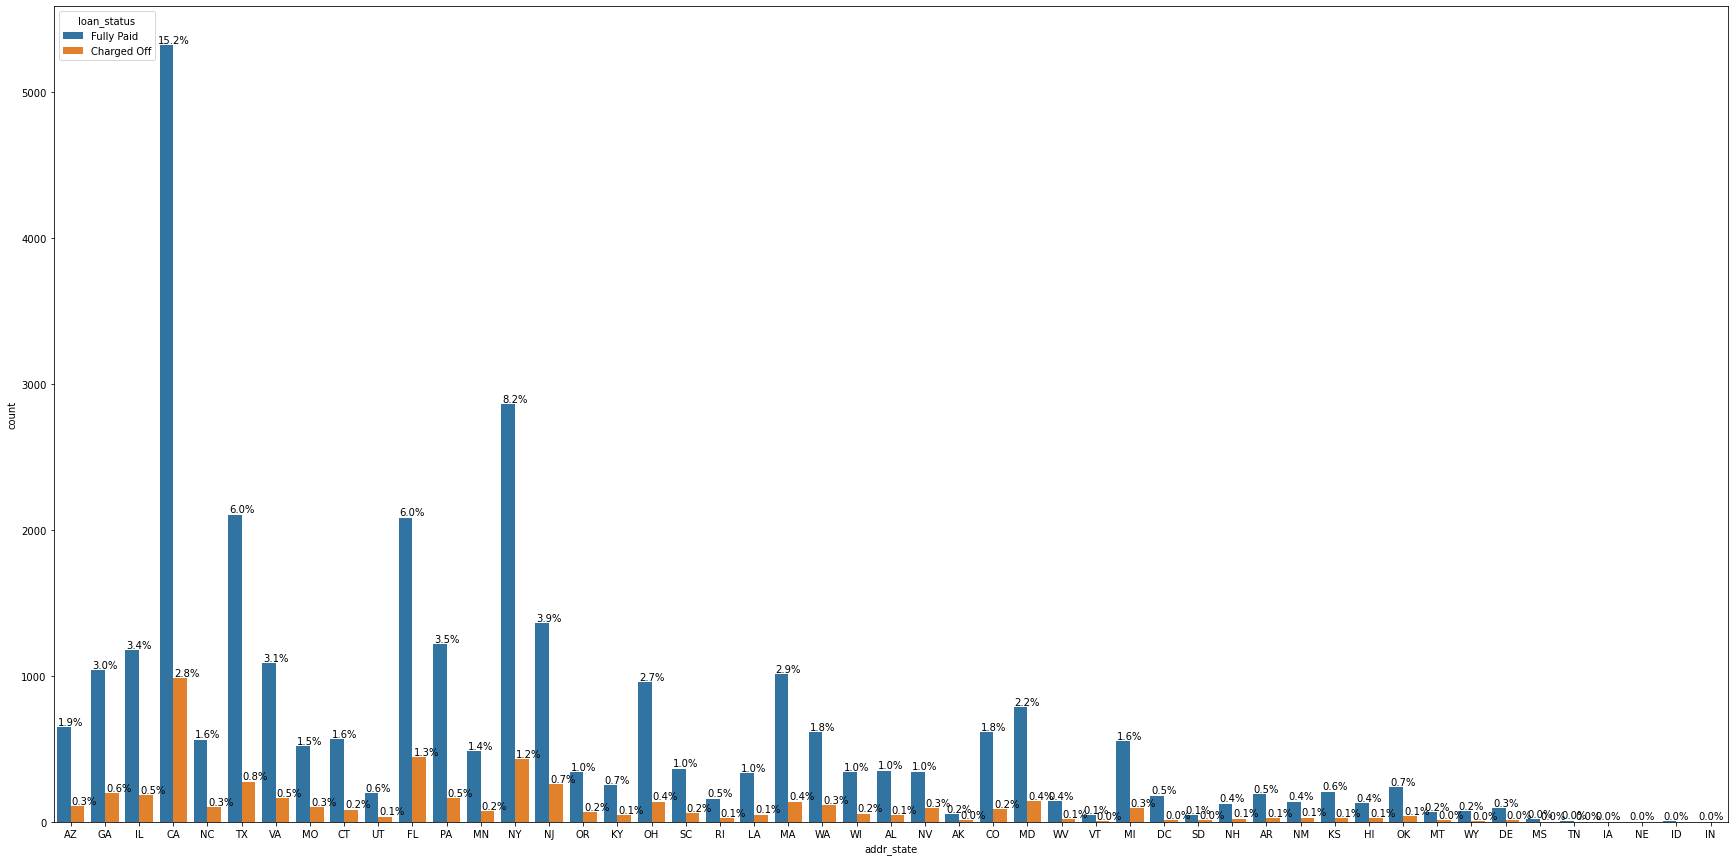

<AxesSubplot:xlabel='addr_state', ylabel='count'>

In [70]:
segunivariatecountplot('addr_state',"loan_status",30,15)

## - Employee Length

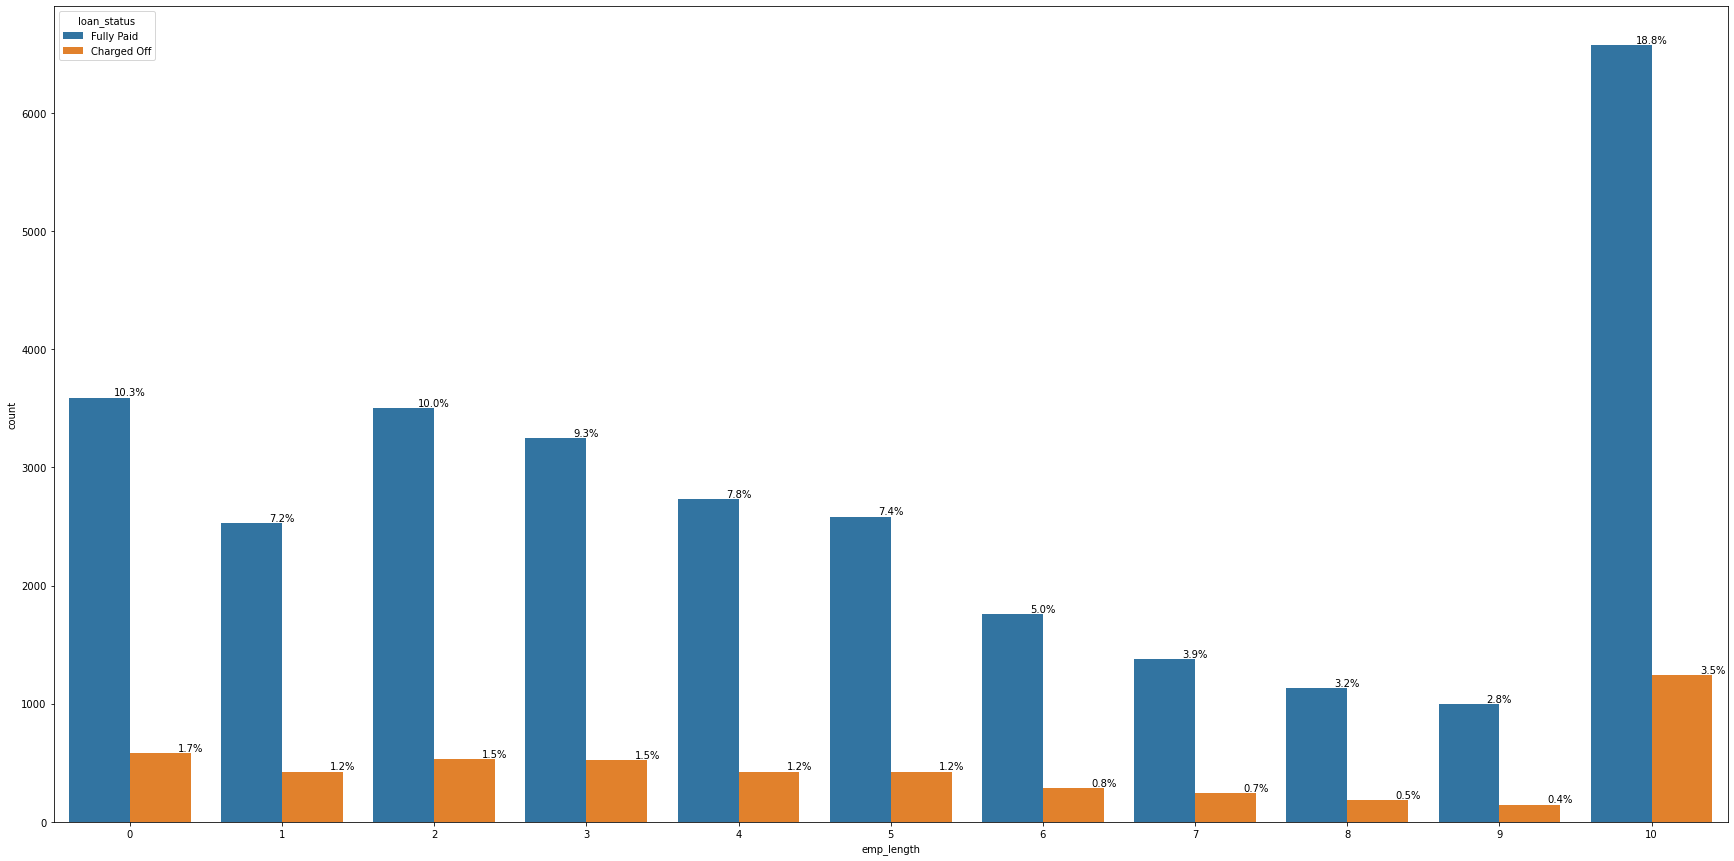

<AxesSubplot:xlabel='emp_length', ylabel='count'>

In [71]:
segunivariatecountplot('emp_length',"loan_status",30,15)

#### Remarks:
#### We noticed that the State CA has High Full Paid as well as Charged off compared to other states.

# Bivariate Analysis

In [72]:
#Creating Definition for Percentage Calculation for loan status, loan status bar chart, hisplot inorder to minimize the coding
def loanstatusdef(x,y):
    plt.subplots(figsize=(20, 8))
    plt.margins(0.2, 0.2)
    plt.tight_layout() 
    key_vs_loan = loancopy.groupby([x, y])[y].count().unstack().reset_index()
    key_vs_loan['Charged Off']= key_vs_loan['Charged Off'].fillna(0)
    key_vs_loan['Fully Paid']=key_vs_loan['Fully Paid'].fillna(0)
    key_vs_loan['Total']=key_vs_loan['Charged Off']+key_vs_loan['Fully Paid']
    key_vs_loan['Chargedoff_Proportion'] = key_vs_loan['Charged Off']*100/key_vs_loan['Total']
    key_vs_loan['FullPaid_Proportion'] = key_vs_loan['Fully Paid']*100/key_vs_loan['Total']
    perctable=key_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)
    percchart=sns.barplot(x=x, y='Chargedoff_Proportion', data=key_vs_loan)
    plt.show()
    return perctable,percchart

def histplotdef(x,y,xaxis,yaxis):
    plt.subplots(figsize=(xaxis, yaxis))
    axnew=sns.histplot(binwidth=0.5, x=x, hue=y, data=loancopy, stat="probability", multiple='fill')
    return axnew

### Annual Income Vs Loan Status

#### As we know that annual income binning value was 10000, So converting numerical data to categorical value and store it in a seperate column

In [73]:
loancopy['annual_inc_bin']=pd.cut(loancopy['annual_inc'], [0,20000,40000,60000,80000,100000,120000,160000], labels=['0-20000','20000-40000','40000-60000','60000-80000','80000-100000','100000-120000','120000-160000'])
loancopy.head(1)

<ipython-input-73-2679572044e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loancopy['annual_inc_bin']=pd.cut(loancopy['annual_inc'], [0,20000,40000,60000,80000,100000,120000,160000], labels=['0-20000','20000-40000','40000-60000','60000-80000','80000-100000','100000-120000','120000-160000'])


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_month,issue_year,annual_inc_bin
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,10,...,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0,Dec,2011,20000-40000


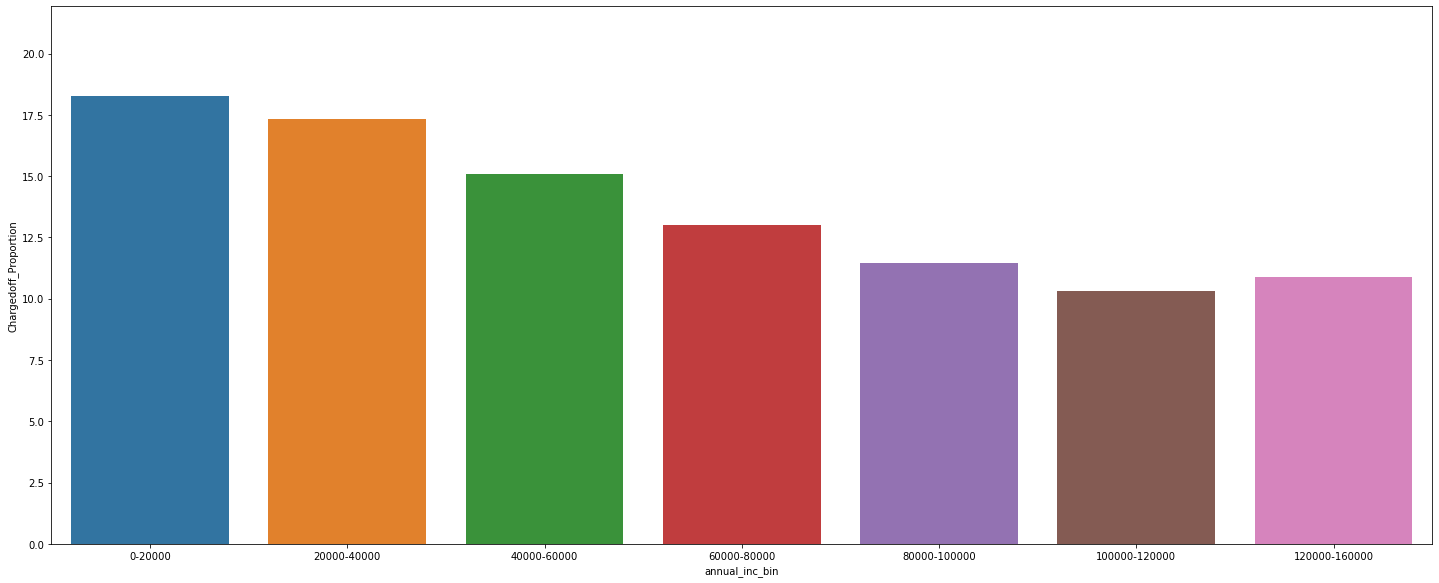

loan_status,annual_inc_bin,Charged Off,Fully Paid,Total,Chargedoff_Proportion,FullPaid_Proportion
0,0-20000,173,774,947,18.268215,81.731785
1,20000-40000,1370,6542,7912,17.315470,82.684530
2,40000-60000,1630,9170,10800,15.092593,84.907407
3,60000-80000,957,6401,7358,13.006252,86.993748
4,80000-100000,503,3886,4389,11.460469,88.539531
6,120000-160000,149,1220,1369,10.883857,89.116143
5,100000-120000,233,2024,2257,10.323438,89.676562


In [74]:
tab,char=loanstatusdef('annual_inc_bin', 'loan_status')
pd.DataFrame(tab)

<AxesSubplot:xlabel='annual_inc_bin', ylabel='Probability'>

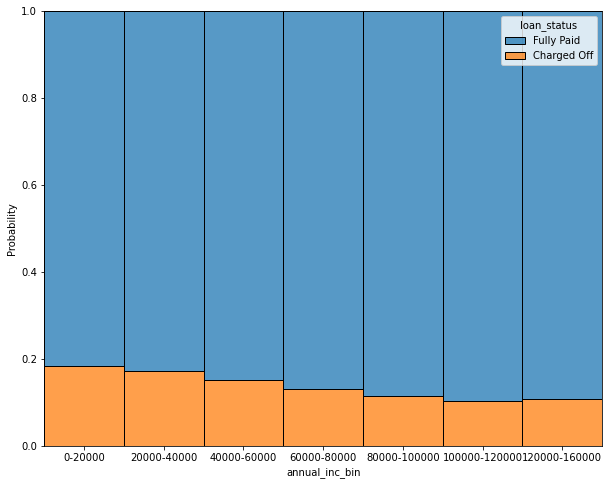

In [75]:
histplotdef('annual_inc_bin', 'loan_status',10,8)

#### Remarks:
#### As we came to know that while plotting the loan status against the annual income, 18.2% of customer whose earning of 0-20000 are becoming defaulters (Charged-off)

### DTI vs Loan Status

In [76]:
loancopy['dti_binning'] = pd.cut(loancopy['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])
loancopy.head(1)

<ipython-input-76-5b7417ce9d0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loancopy['dti_binning'] = pd.cut(loancopy['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_month,issue_year,annual_inc_bin,dti_binning
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,10,...,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0,Dec,2011,20000-40000,NaN


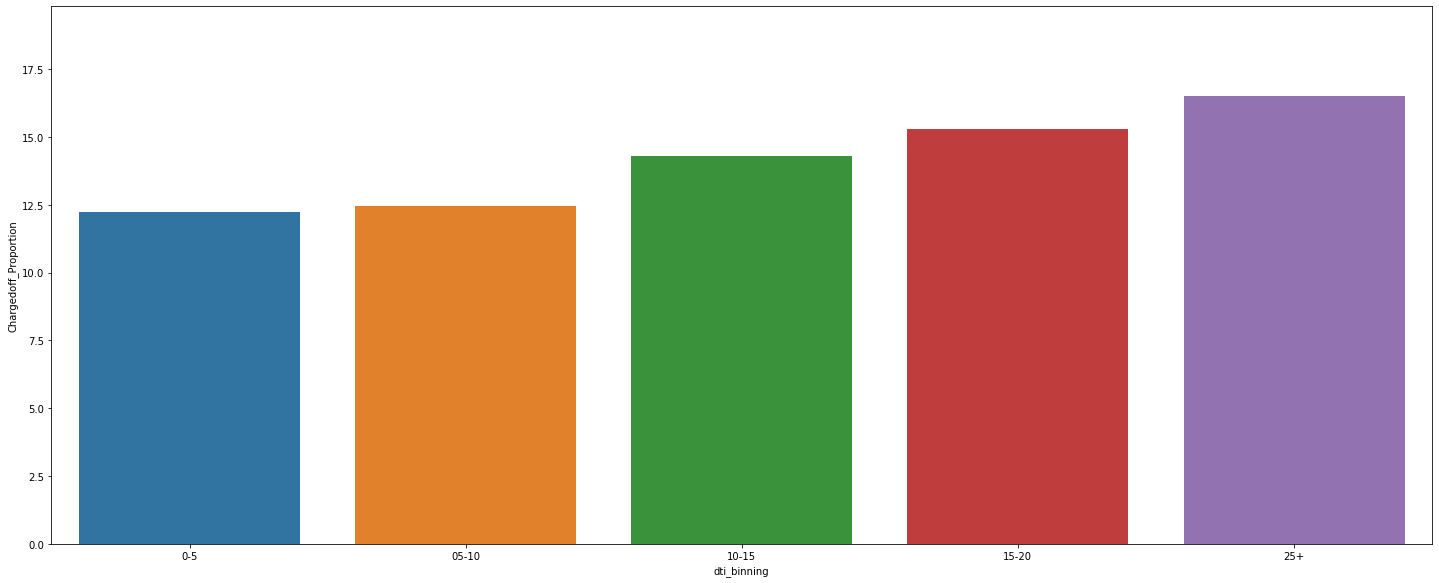

loan_status,dti_binning,Charged Off,Fully Paid,Total,Chargedoff_Proportion,FullPaid_Proportion
4,25+,1026,5188,6214,16.511104,83.488896
3,15-20,1253,6935,8188,15.302882,84.697118
2,10-15,1261,7550,8811,14.311656,85.688344
1,05-10,862,6054,6916,12.463852,87.536148
0,0-5,511,3663,4174,12.242453,87.757547


In [77]:
tab,char=loanstatusdef('dti_binning', 'loan_status')
pd.DataFrame(tab)

#### Remarks:
#### As we can see that More DTI the large amout of charge off(Defaulter) and vice versa

### Interest Rate Vs Loan Status

In [78]:
loancopy['int_rate_binning'] = pd.cut(loancopy['int_rate'], [5, 10, 15, 20, 25], labels=['05-10', '10-15', '15-20', '25-30'])
loancopy.head(1)

<ipython-input-78-30cbc65ae523>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loancopy['int_rate_binning'] = pd.cut(loancopy['int_rate'], [5, 10, 15, 20, 25], labels=['05-10', '10-15', '15-20', '25-30'])


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_month,issue_year,annual_inc_bin,dti_binning,int_rate_binning
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,10,...,Fully Paid,credit_card,AZ,27.65,0.0,Dec,2011,20000-40000,NaN,10-15


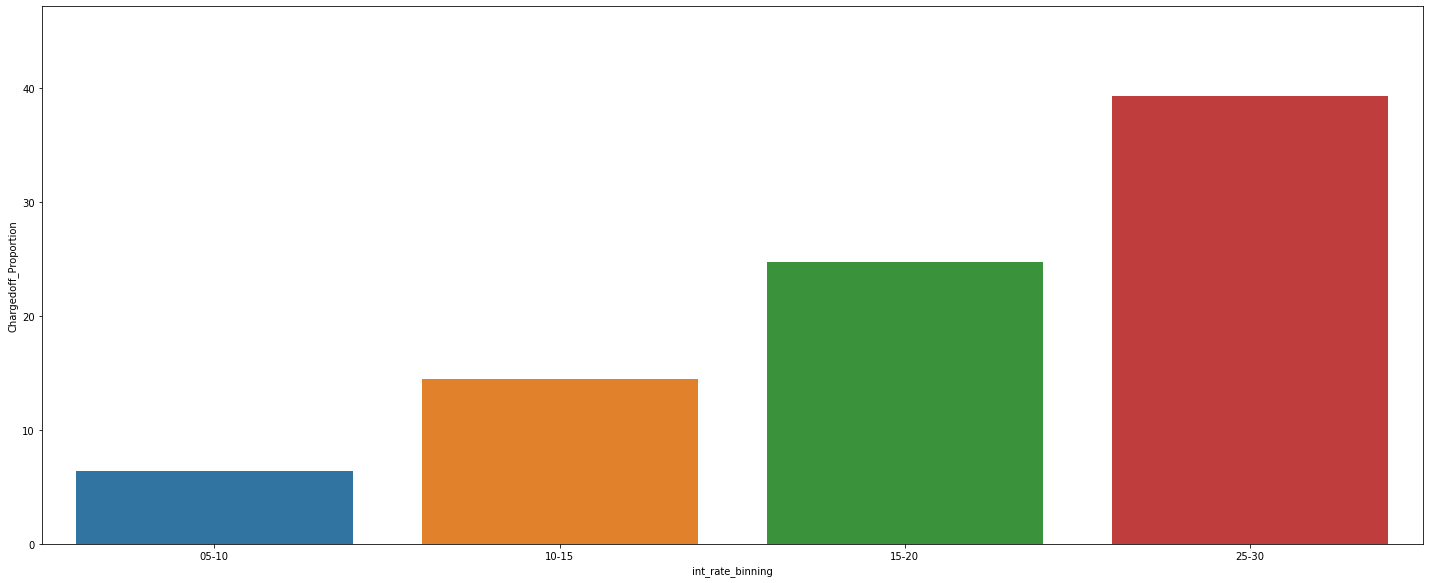

loan_status,int_rate_binning,Charged Off,Fully Paid,Total,Chargedoff_Proportion,FullPaid_Proportion
3,25-30,262,405,667,39.280360,60.719640
2,15-20,1631,4968,6599,24.715866,75.284134
1,10-15,2408,14240,16648,14.464200,85.535800
0,05-10,714,10404,11118,6.422018,93.577982


In [79]:
tab,char=loanstatusdef('int_rate_binning', 'loan_status')
pd.DataFrame(tab)

<AxesSubplot:xlabel='int_rate_binning', ylabel='Probability'>

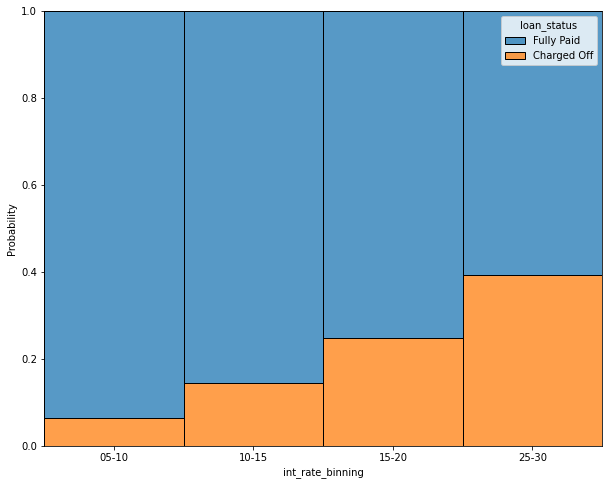

In [80]:
histplotdef('int_rate_binning', 'loan_status',10,8)

#### Remarks:
#### We infer that the lower interest rate having low charge off (i.e 5 - 10 Interest rate having 6.4% of chargeoff) and higher interest rate having higher charge off(i.e. 25-30 Interest rate having 39.28% of charge of). If the interest rate is greater than 15%, there are more charge-of when compared to lower interest rate.

## Grade vs Loan Status

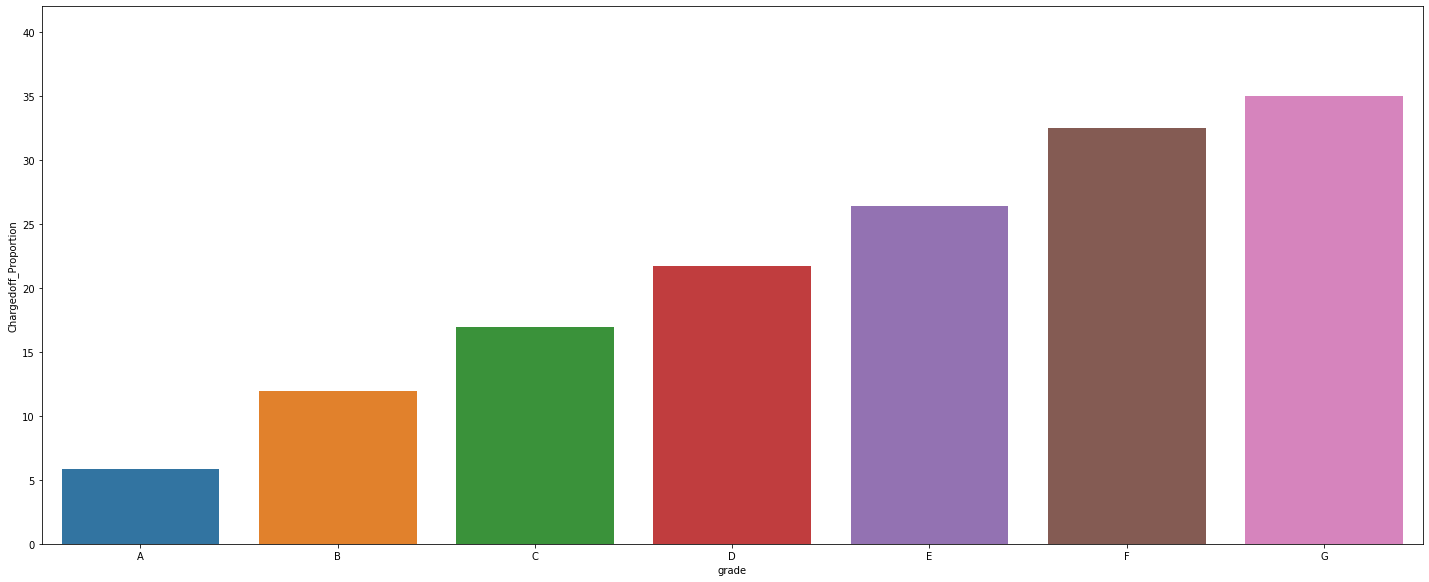

loan_status,grade,Charged Off,Fully Paid,Total,Chargedoff_Proportion,FullPaid_Proportion
6,G,91,169,260,35.000000,65.000000
5,F,278,577,855,32.514620,67.485380
4,E,626,1742,2368,26.435811,73.564189
3,D,1002,3612,4614,21.716515,78.283485
2,C,1209,5925,7134,16.947014,83.052986
1,B,1271,9362,10633,11.953353,88.046647
0,A,538,8630,9168,5.868237,94.131763


In [81]:
tab,char=loanstatusdef('grade', 'loan_status')
pd.DataFrame(tab)

<AxesSubplot:xlabel='grade', ylabel='Probability'>

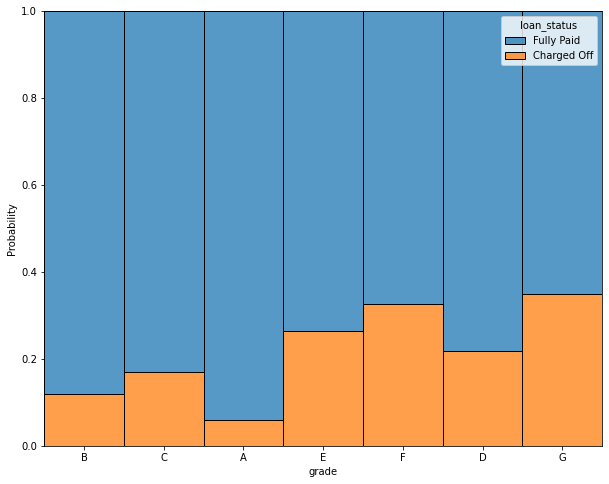

In [82]:
histplotdef('grade', 'loan_status',10,8)

#### Remarks:
#### If we notice the bar chart, we can understand that the grades were gradually increasing with respective to charge-off(defaulter). In-here, we have more number of charge of in Grade F & G and least charge of was at Grade A. Between Grade F & G there was about 3% which is significant.

## Sub Grade Vs Loan Status

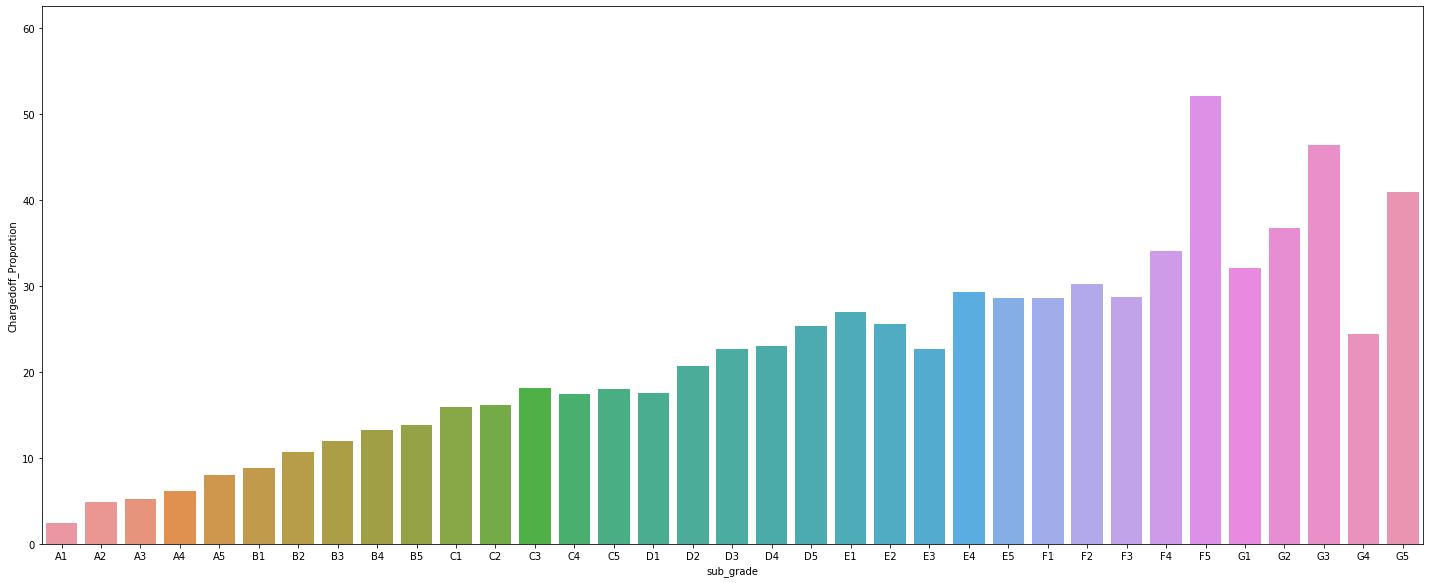

loan_status,sub_grade,Charged Off,Fully Paid,Total,Chargedoff_Proportion,FullPaid_Proportion
29,F5,50,46,96,52.083333,47.916667
32,G3,19,22,41,46.341463,53.658537
34,G5,9,13,22,40.909091,59.090909
31,G2,25,43,68,36.764706,63.235294
28,F4,45,87,132,34.090909,65.909091
30,G1,27,57,84,32.142857,67.857143
26,F2,62,143,205,30.243902,69.756098
23,E4,112,270,382,29.319372,70.680628
27,F3,44,109,153,28.758170,71.241830
25,F1,77,192,269,28.624535,71.375465


In [83]:
tab,char=loanstatusdef('sub_grade', 'loan_status')
pd.DataFrame(tab)

<AxesSubplot:xlabel='sub_grade', ylabel='Probability'>

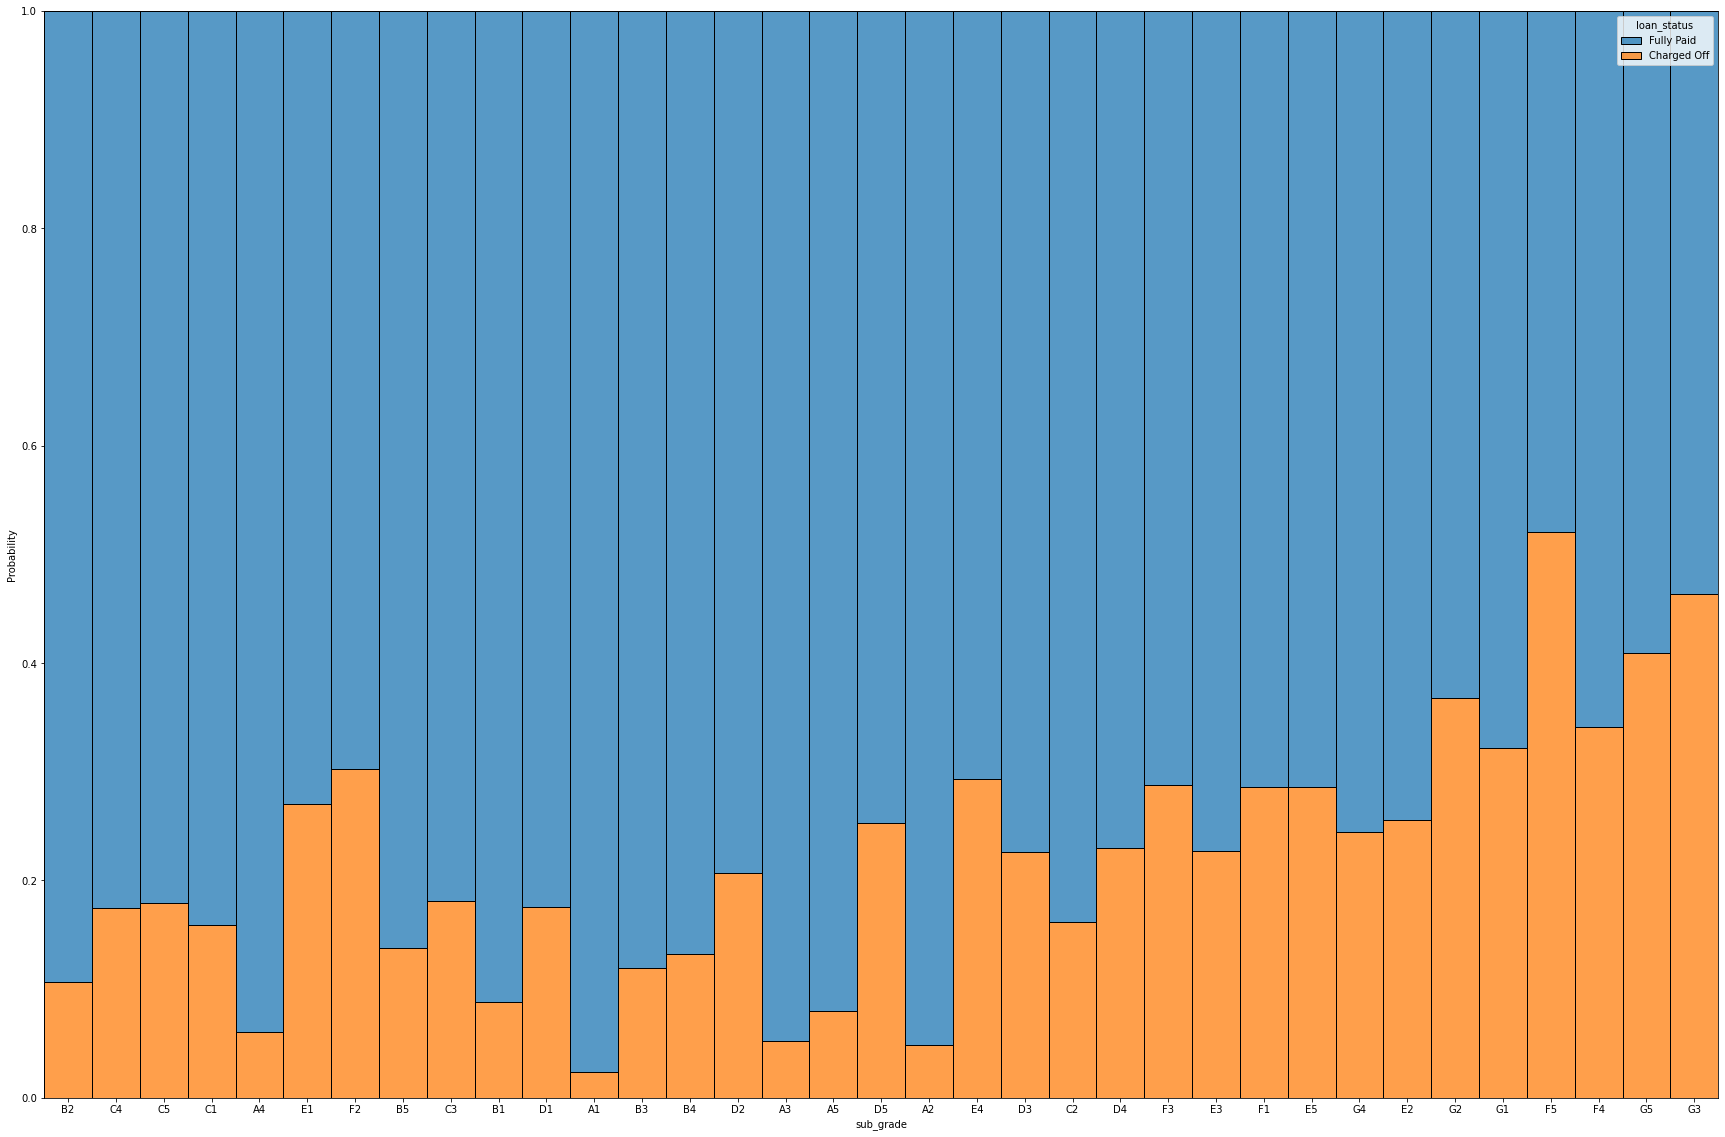

In [84]:
histplotdef('sub_grade', 'loan_status',30,20)

#### Remarks:
#### we can understand that the grades were gradually increasing with respective to charge-of(defaulter). Here we can see that the inference which we got from grade vs loan status are same. Grade F & G are having higher charge of and sub grade F5 & G3 are having higher charge-of
#### (Note: Kindly refer the above table)

## Employee Length vs Loan Status

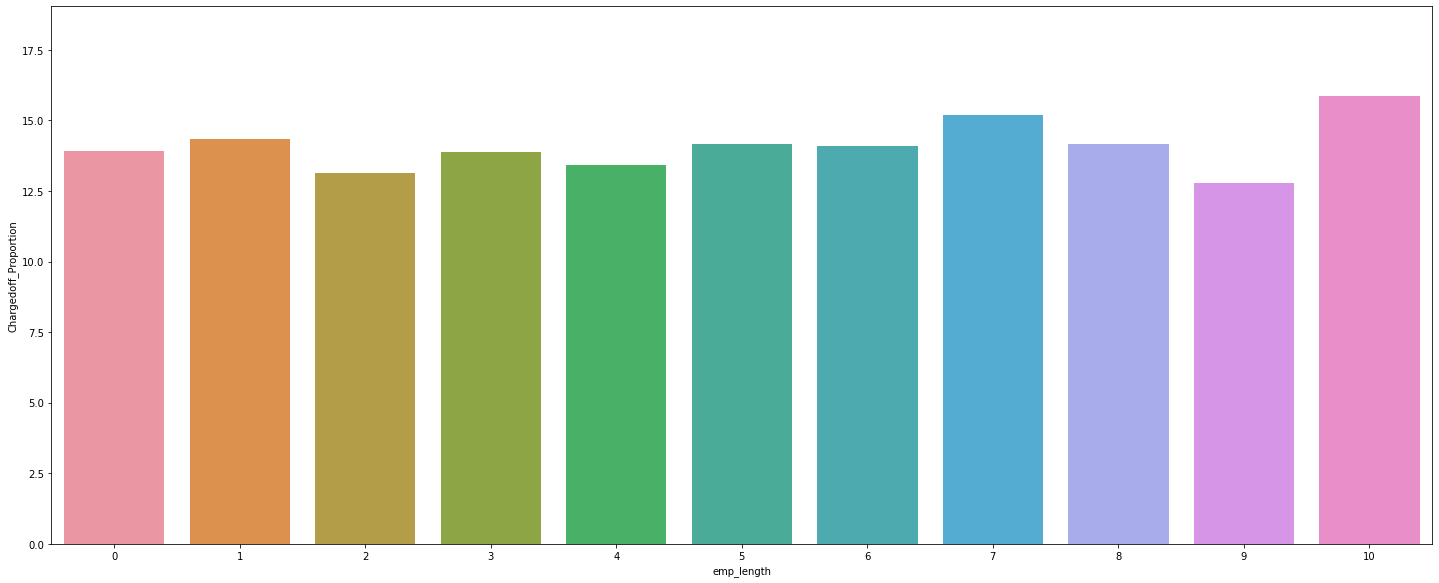

loan_status,emp_length,Charged Off,Fully Paid,Total,Chargedoff_Proportion,FullPaid_Proportion
10,10,1239,6572,7811,15.862246,84.137754
7,7,246,1375,1621,15.175817,84.824183
1,1,424,2529,2953,14.358280,85.641720
8,8,187,1133,1320,14.166667,85.833333
5,5,426,2584,3010,14.152824,85.847176
6,6,288,1758,2046,14.076246,85.923754
0,0,581,3591,4172,13.926174,86.073826
3,3,524,3247,3771,13.895518,86.104482
4,4,424,2733,3157,13.430472,86.569528
2,2,530,3500,4030,13.151365,86.848635


In [85]:
tab,char=loanstatusdef('emp_length', 'loan_status')
pd.DataFrame(tab)

<AxesSubplot:xlabel='emp_length', ylabel='Probability'>

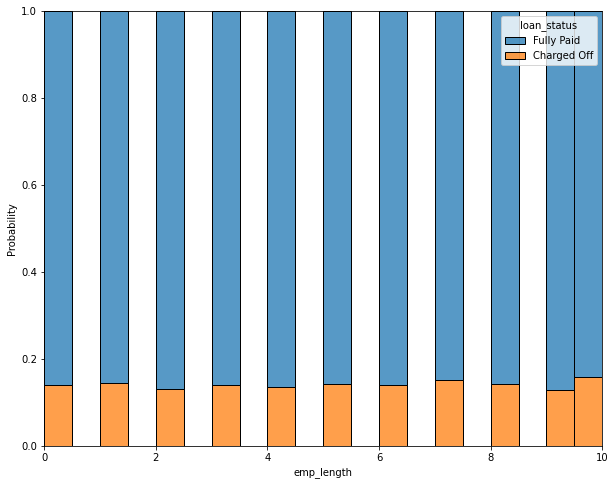

In [86]:
histplotdef('emp_length', 'loan_status',10,8)

#### Remarks:
#### The employee Length ranges from 0 to 10, In this we are getting the charge-of where the employee length is 7 & 10. In this experience, we are getting more charge of.

## Purpose vs Loan Status

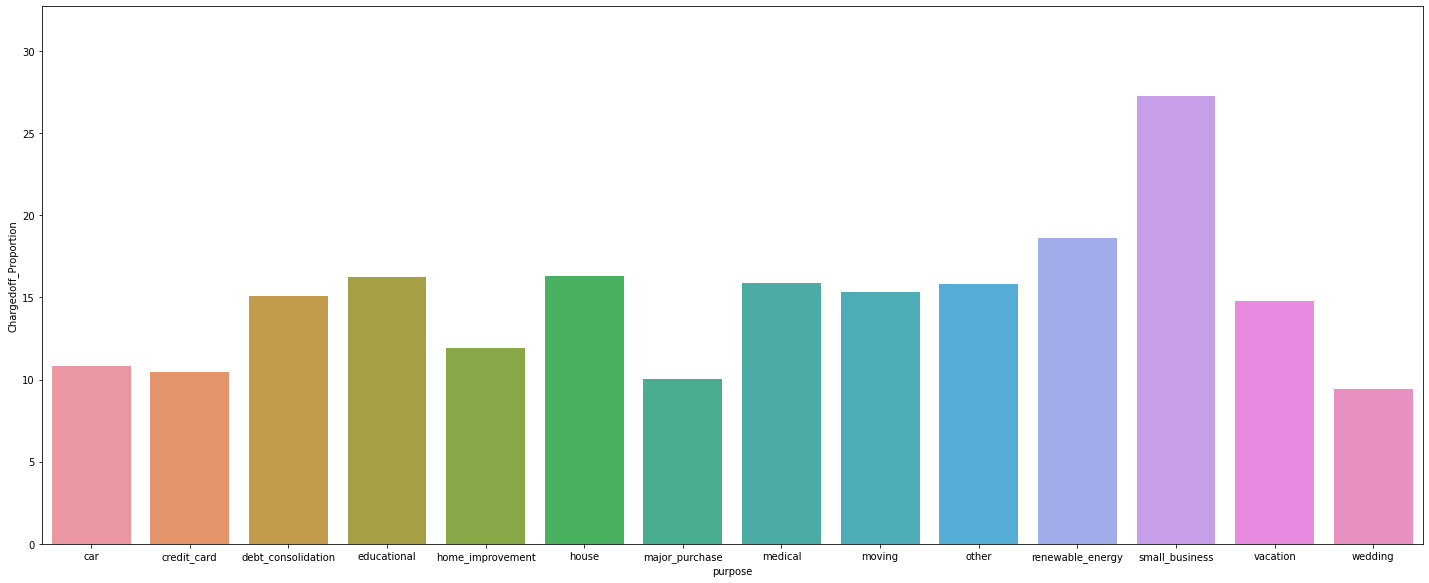

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_Proportion,FullPaid_Proportion
11,small_business,417,1113,1530,27.254902,72.745098
10,renewable_energy,16,70,86,18.604651,81.395349
5,house,52,267,319,16.300940,83.699060
3,educational,46,237,283,16.254417,83.745583
7,medical,97,514,611,15.875614,84.124386
9,other,545,2895,3440,15.843023,84.156977
8,moving,79,437,516,15.310078,84.689922
2,debt_consolidation,2515,14165,16680,15.077938,84.922062
12,vacation,49,283,332,14.759036,85.240964
4,home_improvement,292,2160,2452,11.908646,88.091354


In [87]:
tab,char=loanstatusdef('purpose', 'loan_status')
pd.DataFrame(tab)

#### Remarks
#### Small Business purpose are having higher charge-of compared to other purposes.

## Verification Status vs Loan Status

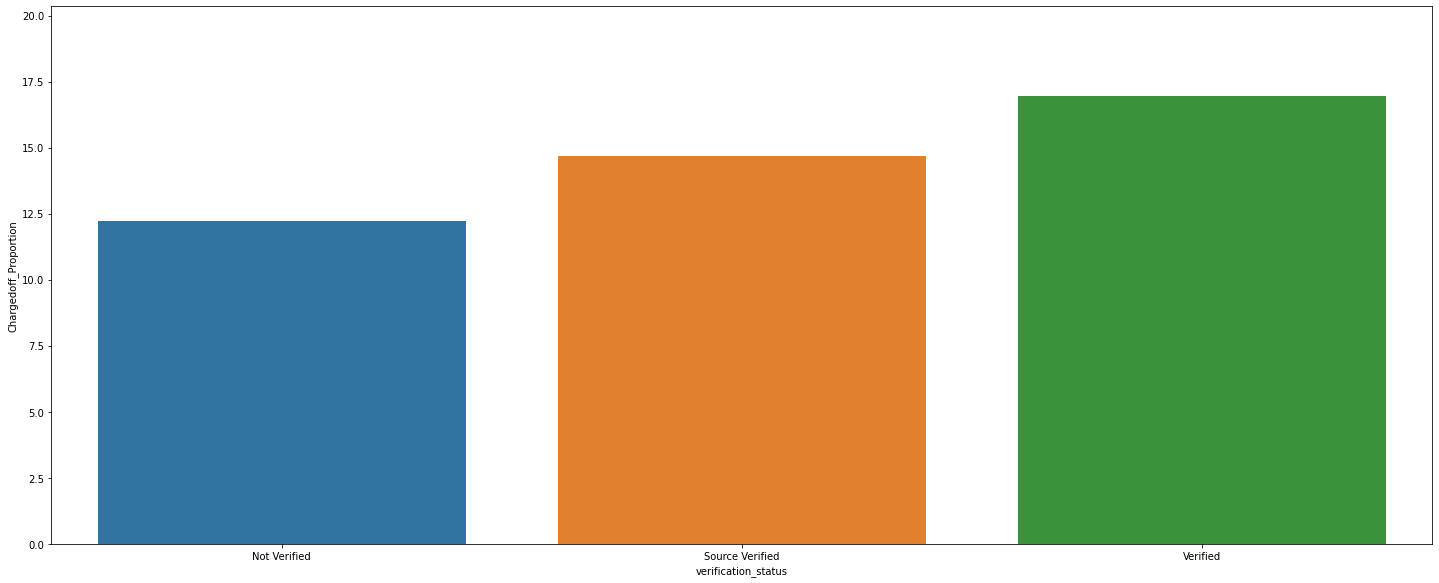

loan_status,verification_status,Charged Off,Fully Paid,Total,Chargedoff_Proportion,FullPaid_Proportion
2,Verified,1839,9010,10849,16.950871,83.049129
1,Source Verified,1322,7673,8995,14.697054,85.302946
0,Not Verified,1854,13334,15188,12.207006,87.792994


In [88]:
tab,char=loanstatusdef('verification_status', 'loan_status')
pd.DataFrame(tab)

#### Remarks:
#### As we can see that for the verified status, The charge-of was about 17%. 

## Interest Rate Vs Term

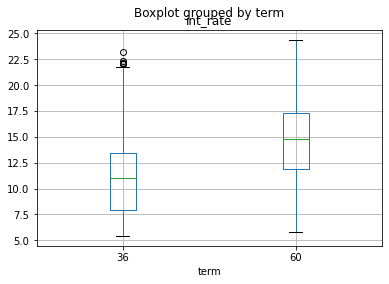

In [89]:
loancopy.boxplot(column='int_rate', by='term')
plt.show()

#### Remarks:
#### As we can see that the term 60 months has higher rate of interest when compared to the term 36 months. The inference that we can take is Higher term results in higher interest rate and vice versa

## Funded Amount Investment vs Grade

#### Funded Amount Investement is the Investor approved against the loan amount based on various financial criteria

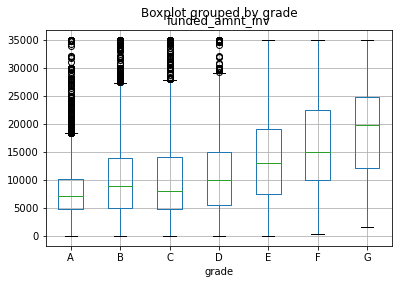

In [90]:
loancopy.boxplot(column='funded_amnt_inv', by='grade')
plt.show()

#### Remarks:
#### As we can see that Larger amount of loans appear having lower grade i.e 'G' grade and the median of Grade 'G' is almost 20000 which is comparatively greater than the grade 'A','B','C','D'.'E','F'

## Public Record Bankruptcies vs Loan Status

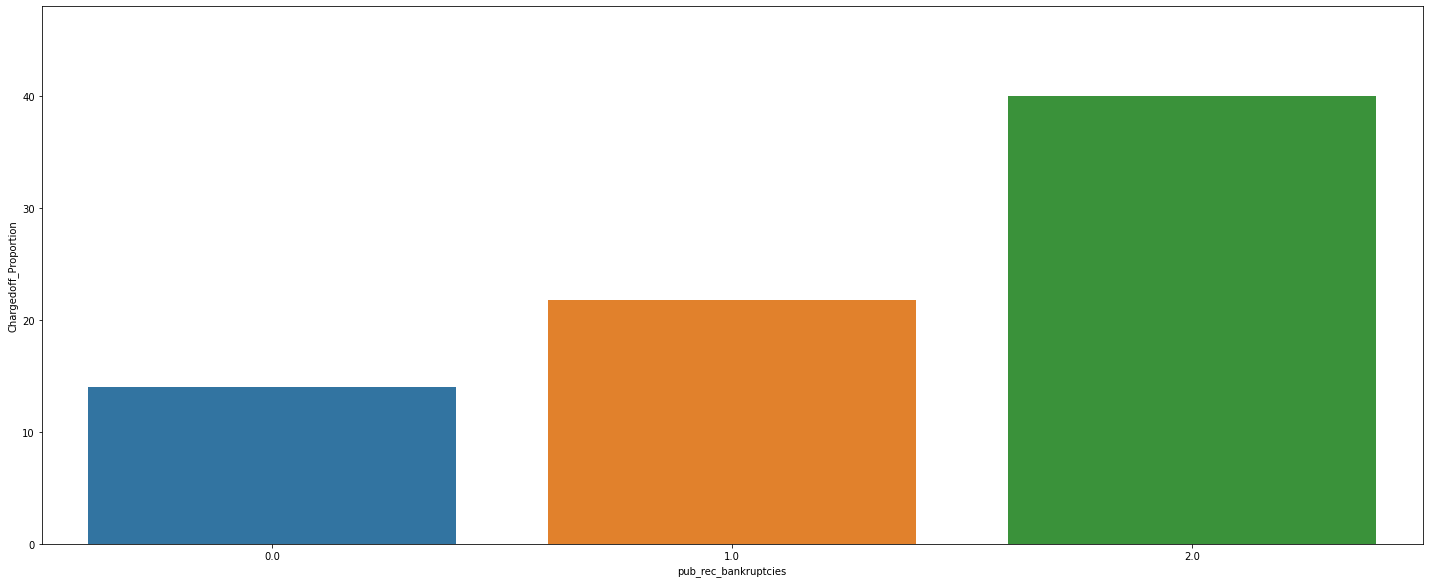

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,Total,Chargedoff_Proportion,FullPaid_Proportion
2,2.0,2,3,5,40.000000,60.000000
1,1.0,324,1166,1490,21.744966,78.255034
0,0.0,4689,28848,33537,13.981573,86.018427


In [91]:
tab,char=loanstatusdef('pub_rec_bankruptcies', 'loan_status')
pd.DataFrame(tab)

#### Remarks:
#### As we can see that twice number of bankruptcies are having higher charge off i.e 40%

## Home Ownership vs Loan Status

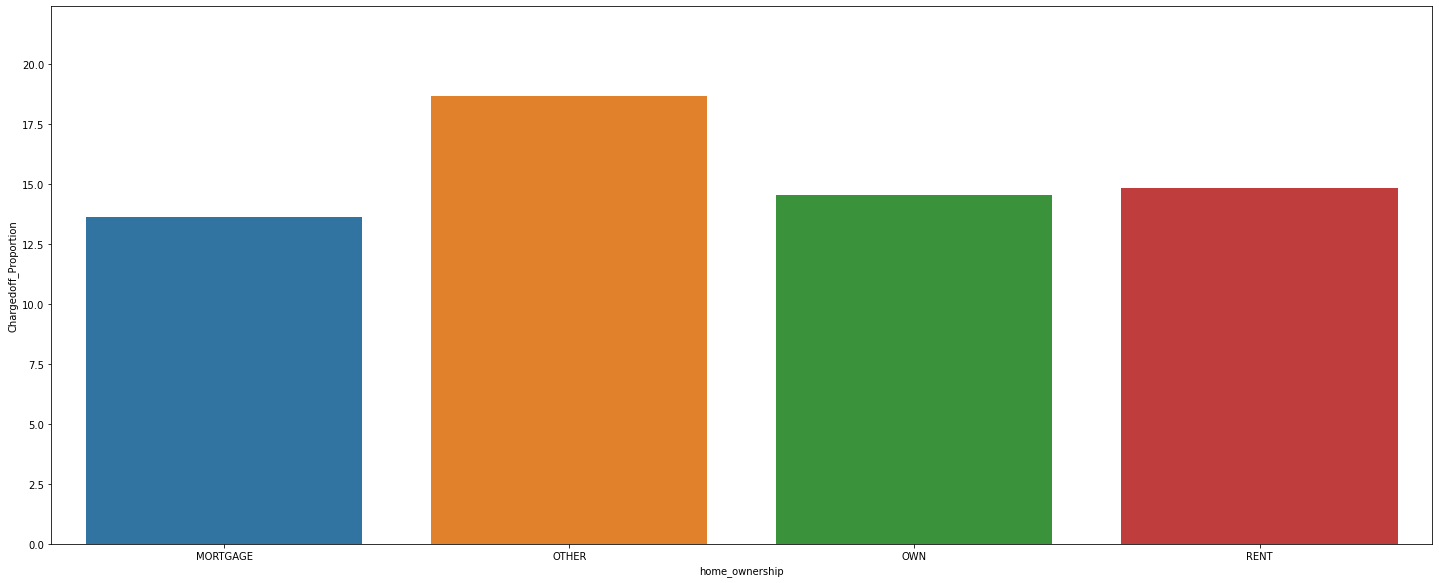

loan_status,home_ownership,Charged Off,Fully Paid,Total,Chargedoff_Proportion,FullPaid_Proportion
1,OTHER,17,74,91,18.681319,81.318681
3,RENT,2556,14660,17216,14.846654,85.153346
2,OWN,377,2213,2590,14.555985,85.444015
0,MORTGAGE,2065,13070,15135,13.643872,86.356128


In [92]:
tab,char=loanstatusdef('home_ownership', 'loan_status')
pd.DataFrame(tab)

#### Remarks:
#### As we can see that other home ownership has more chargeoff compared to other home ownership

## Issue Month vs Loan Status

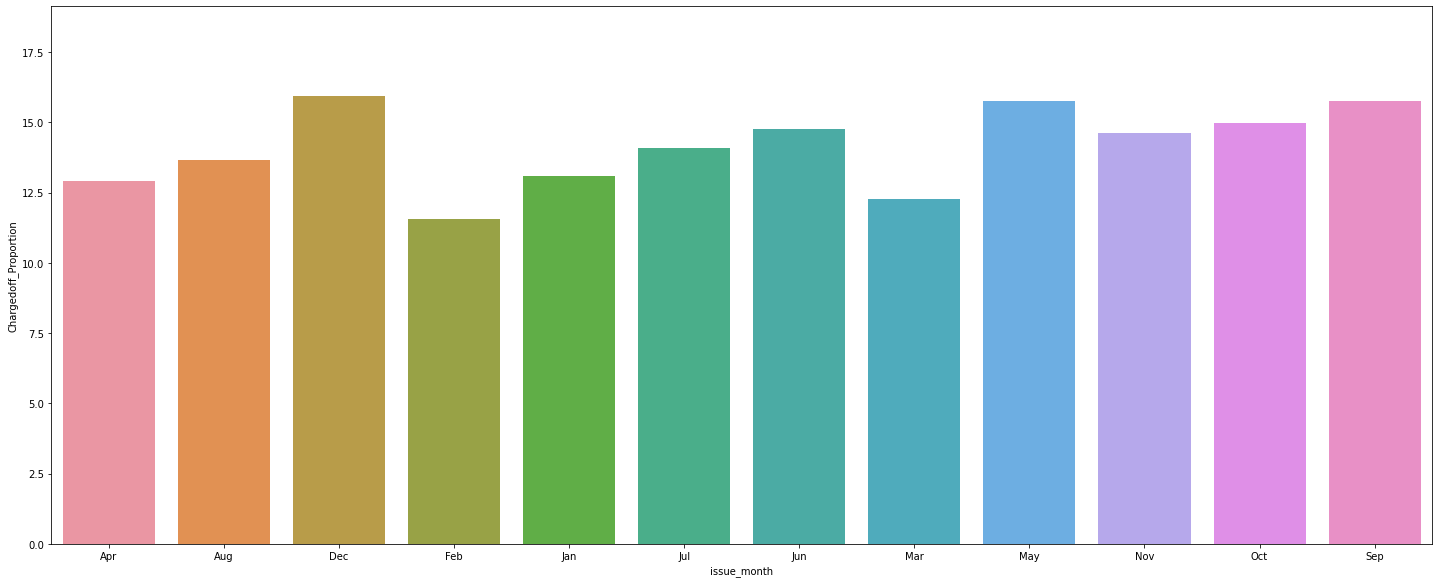

loan_status,issue_month,Charged Off,Fully Paid,Total,Chargedoff_Proportion,FullPaid_Proportion
2,Dec,615,3245,3860,15.932642,84.067358
8,May,428,2286,2714,15.770081,84.229919
11,Sep,500,2672,3172,15.762926,84.237074
10,Oct,505,2866,3371,14.980718,85.019282
6,Jun,432,2497,2929,14.749061,85.250939
9,Nov,538,3138,3676,14.635473,85.364527
5,Jul,434,2645,3079,14.095486,85.904514
1,Aug,427,2701,3128,13.650895,86.349105
4,Jan,270,1792,2062,13.094083,86.905917
0,Apr,341,2300,2641,12.911776,87.088224


In [93]:
tab,char=loanstatusdef('issue_month', 'loan_status')
pd.DataFrame(tab)

#### Remarks:
#### As we can see that the loan which were provided to customer on december, May & September month has higher charge off compared to other month

## Issue Year vs Loan Status

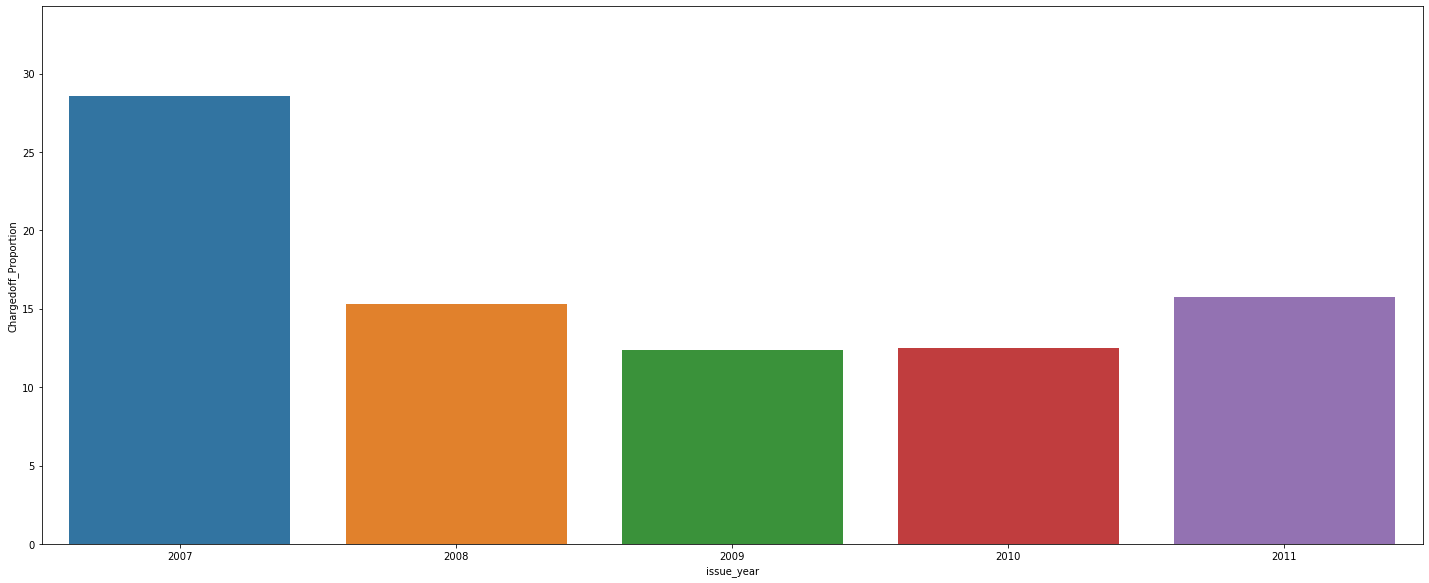

loan_status,issue_year,Charged Off,Fully Paid,Total,Chargedoff_Proportion,FullPaid_Proportion
0,2007,2,5,7,28.571429,71.428571
4,2011,2962,15829,18791,15.762865,84.237135
1,2008,161,891,1052,15.304183,84.695817
3,2010,1337,9374,10711,12.482495,87.517505
2,2009,553,3918,4471,12.368598,87.631402


In [94]:
tab,char=loanstatusdef('issue_year', 'loan_status')
pd.DataFrame(tab)

#### Remarks:
#### As we can see that the loan which were provided to customer on 2007 year has higher charge off compared to other year

## Address State vs Funded Amount Investment

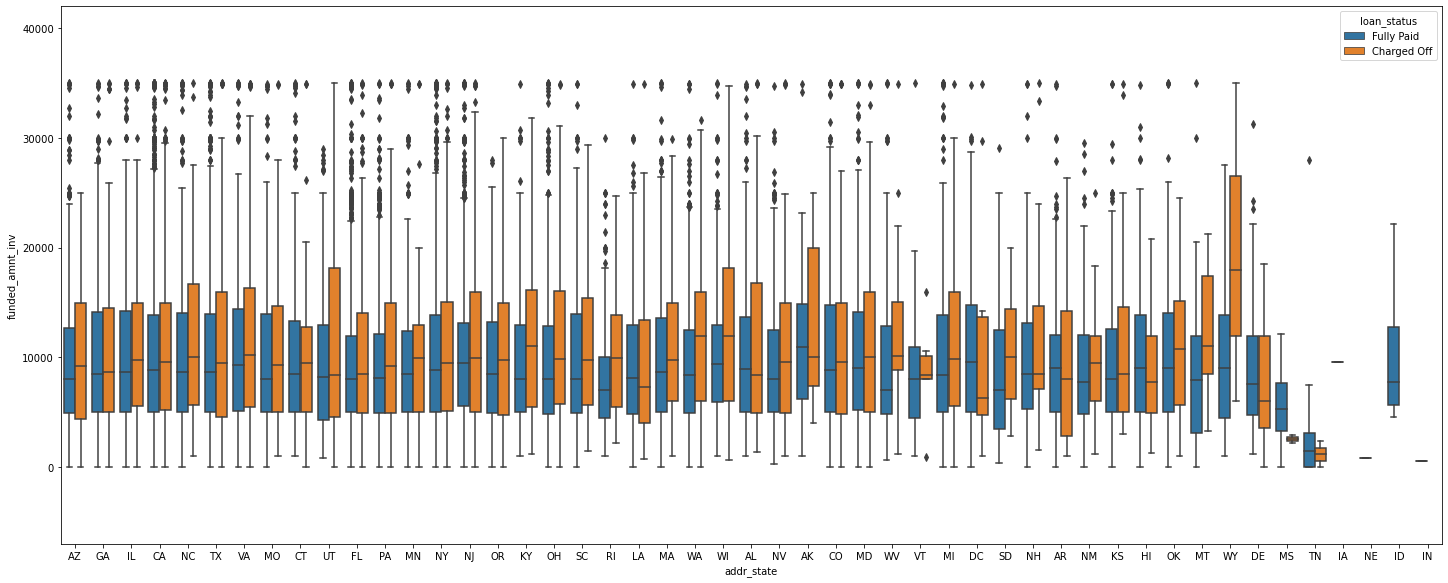

In [95]:
plt.subplots(figsize=(20, 8))
plt.margins(0.2, 0.2)
plt.tight_layout() 
total = float(len(loancopy))
sns.boxplot(x="addr_state", y="funded_amnt_inv",hue='loan_status', data=loancopy)

plt.show()
    

#### Remarks:
#### As we can see that the customer who got the loan from state 'wy'  has higher charge off compared to other state.

## Loan Amount Vs Interest Rate

<Figure size 864x576 with 0 Axes>

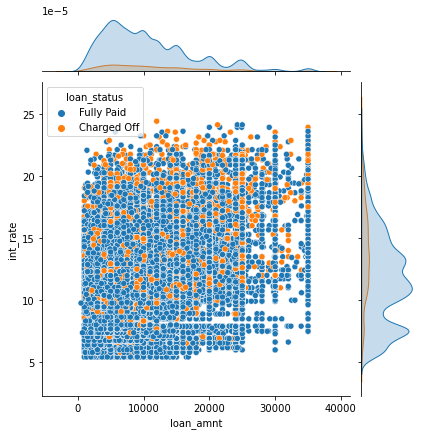

In [96]:
plt.figure(figsize=(12,8))
sns.jointplot(x="loan_amnt",
                    y="int_rate",
                    hue='loan_status',
                    data=loancopy)

#### Remarks:
#### Increase in loan amount increases Interest Rate

## Annual Income vs Funded Amount Investment

<AxesSubplot:xlabel='annual_inc_bin', ylabel='funded_amnt_inv'>

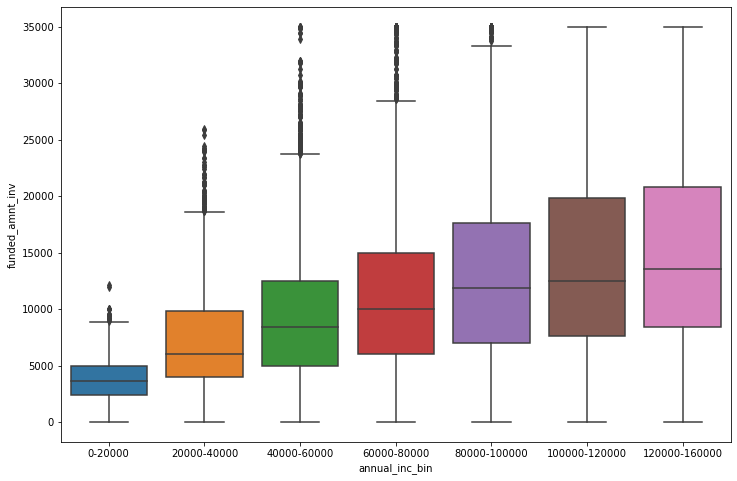

In [97]:
plt.figure(figsize=(12,8))
sns.boxplot(x="annual_inc_bin",
                    y="funded_amnt_inv",
                    data=loancopy)

#### Remarks:
#### As we can see that increase in annual income increase Loan Amount and vice versa. So we can determine that the person who is earning more are requesting loan based on this. 

# Multi Variate Analysis

## Funded Amount Investment vs Grade Vs Term

<AxesSubplot:xlabel='grade', ylabel='funded_amnt_inv'>

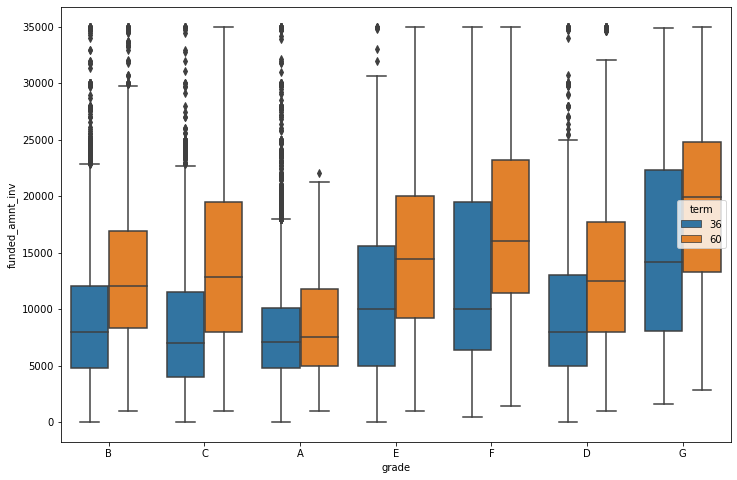

In [98]:
plt.figure(figsize=(12,8))
sns.boxplot(x="grade", y="funded_amnt_inv", hue='term', data=loancopy)

#### Remarks:
#### As we can see that the Grade G has  higher amount of loan with 60 month Term i.e Whenever the customer is opting for Longer term with the Higher loan amount are classified as Grade G

## Funded Amount Investment vs Loan Status Vs Term

<AxesSubplot:xlabel='loan_status', ylabel='funded_amnt_inv'>

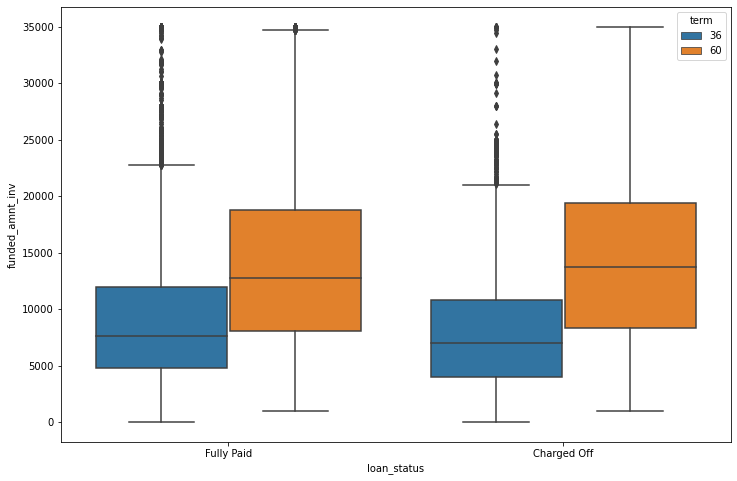

In [99]:
plt.figure(figsize=(12,8))
sns.boxplot(x="loan_status", y="funded_amnt_inv", hue='term', data=loancopy)

#### Remarks
#### When the cutomer has Higher Loan amount with Longer Term are getting more charged-of.

## Funded Amount Investment vs Loan Status vs Issue Year

<AxesSubplot:xlabel='loan_status', ylabel='funded_amnt_inv'>

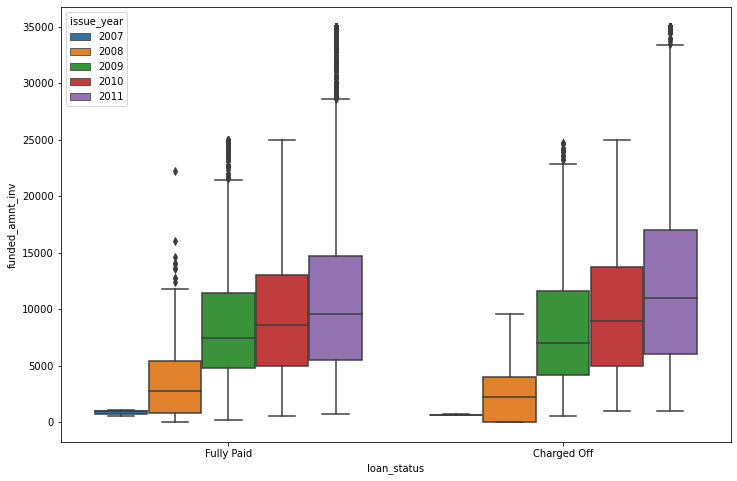

In [100]:
plt.figure(figsize=(12,8))
sns.boxplot(x="loan_status", y="funded_amnt_inv", hue='issue_year', data=loancopy)

#### Remarks
#### As we can see that increase in year there were increase in fully paid and charge off

## Loan Status vs Annual Income vs Employee Length

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

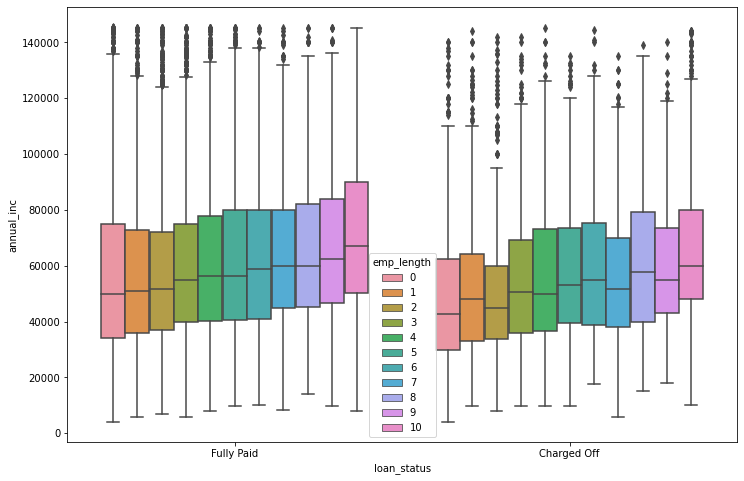

In [101]:
plt.figure(figsize=(12,8))
sns.boxplot(x="loan_status", y="annual_inc", hue='emp_length', data=loancopy)

#### Remarks:
#### As we can see clearly the employee length of 10 has higher rate of fully paid as well as charge off compared to other employee length

## Employee Length vs Annual Income vs Loan Status

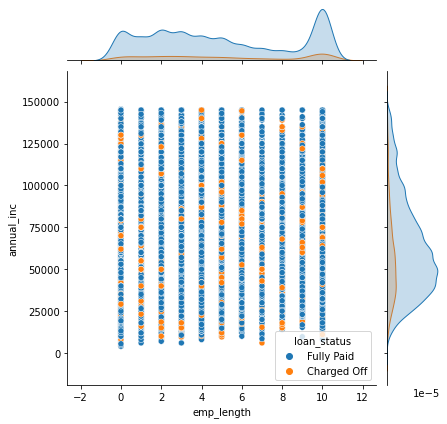

In [102]:
sns.jointplot(x="emp_length",
                    y="annual_inc",
                    hue='loan_status',
                    data=loancopy)

#### Remarks:
#### As we can see that increase in employee length and annaual income there are more Fully paid as well as charge off.

## Annual Income vs Interest Rate Vs Grade

<Figure size 864x576 with 0 Axes>

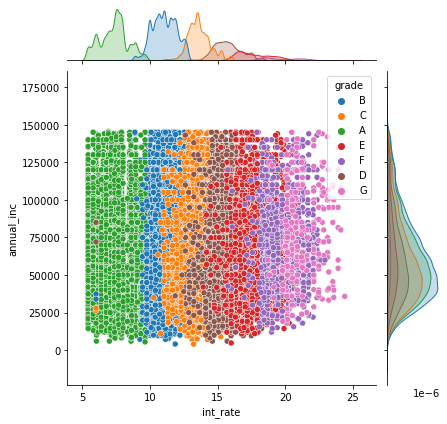

In [103]:
plt.figure(figsize=(12,8))
sns.jointplot(x="int_rate",
                    y="annual_inc",
                    hue='grade',
                    data=loancopy)

#### Remarks:
#### As we can see that the Higher interest rate and higher loan amount are classified as Grade 'G'

## Correlation Between Variables - Using ClusterMap

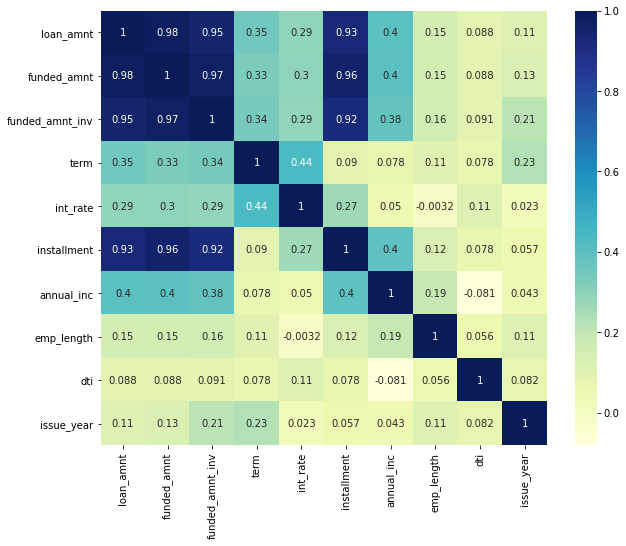

In [104]:
#Filtering out numerical values for correlation
laons_corr_df = loancopy.filter(["loan_amnt", "funded_amnt", "funded_amnt_inv",'term','int_rate','installment','annual_inc','emp_length','dti','issue_year']) 
cor = laons_corr_df.corr()
round(cor, 3)

#Plotting Heat map to understand correlation visually
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

#### Remarks
#### As we can see that 
#### - Loan Amount, Funded Amount, Funded Amount Investment, Installment are Positively correlated.
#### - Annual Income & DTI, Interest Rate & Employment Length are Negatively correlated. If the annual income is low DTI will be High and vice versa and If interest Rate is low Employment Length will be high and vice vera.

# Final Conclusion:
- Higher Loan amount with Longer Term are getting more charged-of  
- Higher Loan amount and Term are classified as G Grade
- Higher Interest Rate leads to Higher Charge of
- Increase in Annual income eventually increase in Loan Amount
- Increase in Loan Amount increases Interest Rate
